In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('customer_retention_case',sep='\t')
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you

In [3]:
#Getting datatypes of the columns
for i in df.columns:
    print(df[i].dtypes)

int64
int64
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object


SEPARATING THE NUMERICAL AND OBJECT DATATYPES FOR BETTER ANALYSIS

In [4]:
obj_col=[]
num_col=[]
for i in df.columns:
    if(df[i].dtypes=='object'):
        obj_col.append(i)
    else:
        num_col.append(i)
print(len(obj_col))
print(len(num_col))
    

25
46


WORKING ON THE NUMERICAL DATA FIRST

In [5]:
df[num_col].isnull().sum()

1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                                                                                                             0
6 How many times you have made an online purchase in the past 1 year?                                                               

<AxesSubplot:>

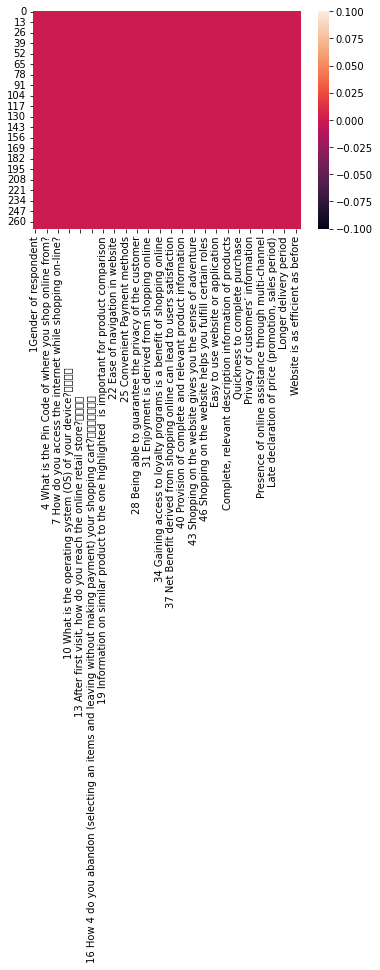

In [6]:
sns.heatmap(df.isnull())

No missing values detected

In [7]:
df[num_col].describe()

,1Gender of respondent,2 How old are you?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.669145,2.959108,220465.747212,3.524164,2.672862,3.260223,1.676580,4.282528,1.776952,1.275093,1.360595,2.546468,3.921933,1.784387,2.884758,2.684015,4.382900,4.137546,3.873606,4.107807,4.286245,4.115242,4.394052,4.368030,4.256506,4.464684,4.591078,4.375465,3.921933,3.565056,4.330855,4.587361,3.955390,4.286245,4.591078,4.379182,4.182156,4.148699,4.349442,4.263941,3.914498,3.553903,3.223048,3.501859,3.282528,4.163569
std,0.471398,1.066012,140524.341051,1.436586,1.651788,1.135887,0.843904,0.923426,0.797892,0.645429,0.897805,1.264718,1.196014,1.084997,1.028380,1.344060,1.046603,0.918123,1.068027,1.082206,1.059

Observations:
    presence of skewness suspected in: How old are you? ,  What is the Pin Code of where you shop online from? ,What is your preferred payment Option?, Why did you abandon the “Bag”, “Shopping Cart”? ,  Ease of navigation in website , User friendly Interface of the website , Monetary savings 
    presence of outliers not detected.

In [8]:
df[num_col].nunique()

1Gender of respondent                                                                                                                                                                                                   2
2 How old are you?                                                                                                                                                                                                      5
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  39
5 Since How Long You are Shopping Online ?                                                                                                                                                                              5
6 How many times you have made an online purchase in the past 1 year?                                                           

OBSERVATION:
ALL THE NUMERICAL FEATURES ARE OF CATEGORICAL TYPE.

In [9]:
df['1Gender of respondent'].value_counts()

1    180
0     89
Name: 1Gender of respondent, dtype: int64

<AxesSubplot:xlabel='1Gender of respondent'>

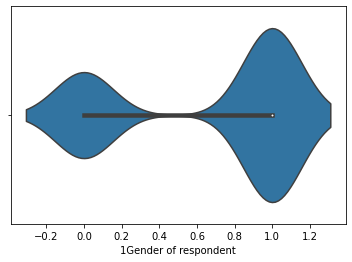

In [10]:
sns.violinplot(df['1Gender of respondent'])

Observations:
    The gender of the respondent feature is of categorical type with two categories ' 0 and 1'.The '1' category of the feature has 180(66.67% approx) samples in the dataset whereas the '0' category has only 89 counts.

In [11]:
df['4 What is the Pin Code of where you shop online from?'].value_counts()

201308    38
132001    19
201310    18
110044    16
173212     9
250001     9
173229     9
560037     8
132036     8
560010     8
122018     8
110011     7
201306     7
110008     7
110014     6
110018     6
244001     5
201312     5
530068     5
201305     5
201009     5
201008     5
201005     4
201001     4
201304     4
110039     4
110030     4
110009     4
560018     4
560003     4
122009     4
560002     4
110042     4
201303     4
560013     3
203001     2
560001     1
203207     1
203202     1
Name: 4 What is the Pin Code of where you shop online from?, dtype: int64

<AxesSubplot:xlabel='4 What is the Pin Code of where you shop online from?', ylabel='count'>

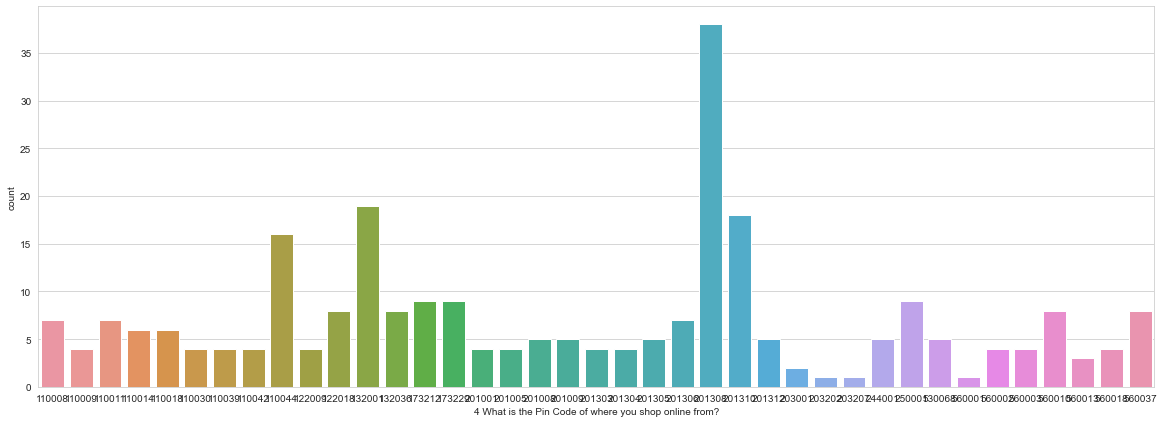

In [12]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='4 What is the Pin Code of where you shop online from?',data=df)

OBSERVATIONS:
    1)Most of the shopping was done from the pincode '201308'(38) followed by '132001'(19),'201310'(18),'110044'(16) and so on.
    2)The least number of shopping was done from 560001(1),203207(1),203202(1).

<AxesSubplot:xlabel='5 Since How Long You are Shopping Online ?', ylabel='count'>

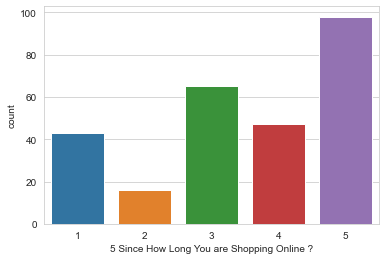

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='5 Since How Long You are Shopping Online ?',data=df)

In [14]:
df['5 Since How Long You are Shopping Online ?'].value_counts()

5    98
3    65
4    47
1    43
2    16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64

Most people(98 or 36.4% approx) had been shopping for 5 years followed by people who had been shopping for 3 years(65).

<AxesSubplot:xlabel='6 How many times you have made an online purchase in the past 1 year?', ylabel='count'>

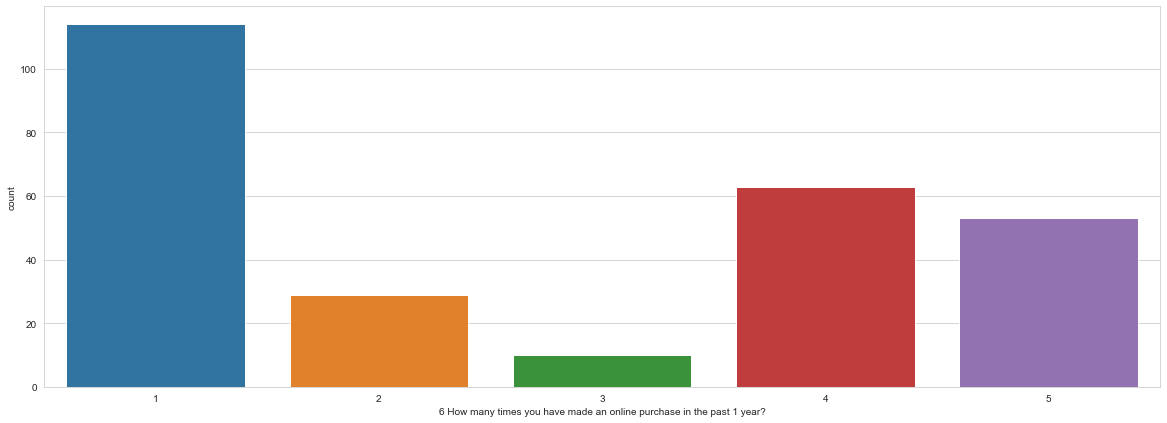

In [15]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='6 How many times you have made an online purchase in the past 1 year?',data=df)

In [16]:
df['6 How many times you have made an online purchase in the past 1 year?'].value_counts()

1    114
4     63
5     53
2     29
3     10
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64

OBSEVATION:
    More people(42.7%) made purchase only one time in the past one year.

<AxesSubplot:xlabel='7 How do you access the internet while shopping on-line?', ylabel='count'>

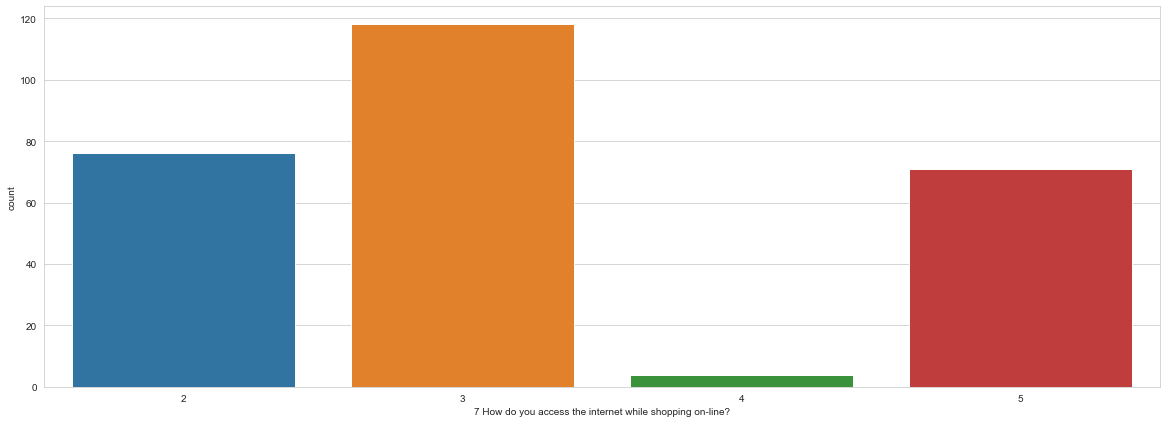

In [17]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='7 How do you access the internet while shopping on-line?',data=df)

In [18]:
df['7 How do you access the internet while shopping on-line?'].value_counts()

3    118
2     76
5     71
4      4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64

OBSERVATION: More people(43.8%) use the '3' type of category in accessing the internet whereas the type '4' category users were the least(1.4% approx).

<AxesSubplot:xlabel='8 Which device do you use to access the online shopping?', ylabel='count'>

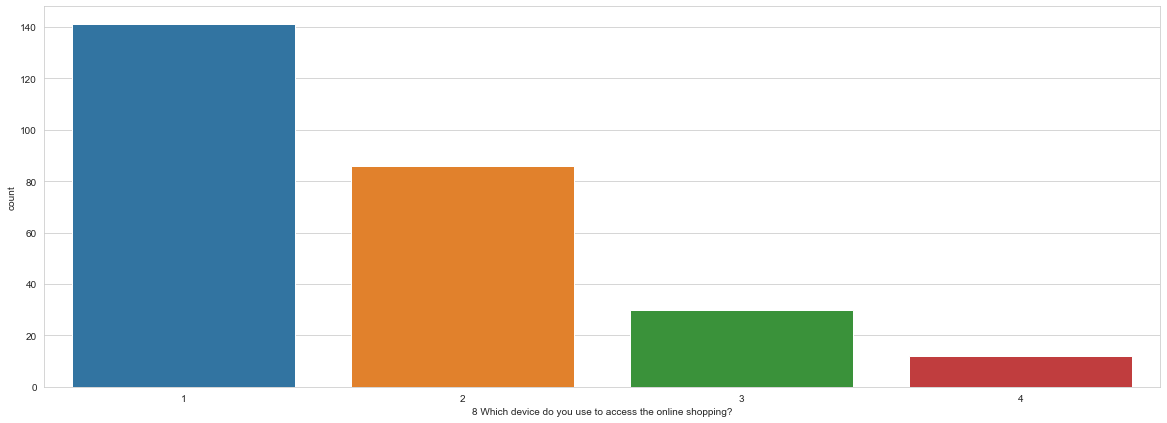

In [19]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='8 Which device do you use to access the online shopping?',data=df)

In [20]:
df['8 Which device do you use to access the online shopping?'].value_counts()

1    141
2     86
3     30
4     12
Name: 8 Which device do you use to access the online shopping?, dtype: int64

OBSERVATIONS:
    More people(52.4%) use the device type '1' for online shopping whereas the device category '4' was used the least(4.46%).

<AxesSubplot:xlabel='9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ', ylabel='count'>

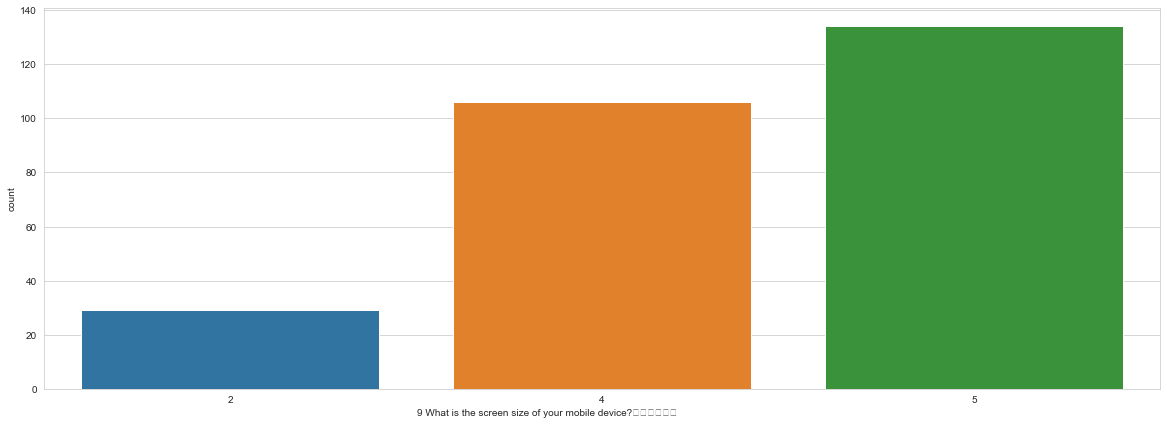

In [21]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',data=df)

In [22]:
df['9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '].value_counts()

5    134
4    106
2     29
Name: 9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        , dtype: int64

OBSERVATION: Most customers had a screen size of category '4' followed by '5'. 
    The customers with the screen size under category '2' were the least(10.7%).

<AxesSubplot:xlabel='10 What is the operating system (OS) of your device?\t\t\t\t                                          ', ylabel='count'>

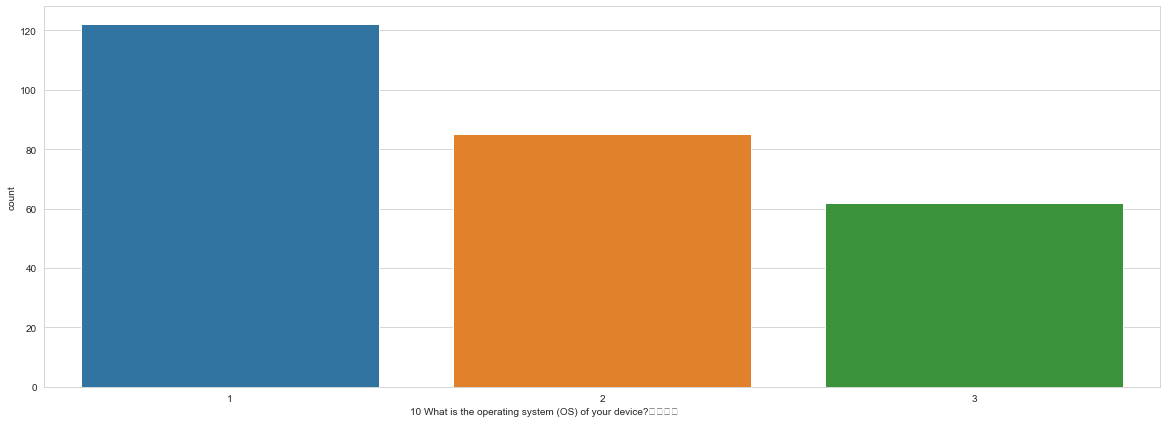

In [23]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='10 What is the operating system (OS) of your device?\t\t\t\t                                          ',data=df)

In [24]:
df['10 What is the operating system (OS) of your device?\t\t\t\t                                          '].value_counts()

1    122
2     85
3     62
Name: 10 What is the operating system (OS) of your device?\t\t\t\t                                          , dtype: int64

OBSERVATION: Customers having an OS of category 1 consituted the bulk of the total(45.35%).

<AxesSubplot:xlabel='11 What browser do you run on your device to access the website?\t\t\t                                                          ', ylabel='count'>

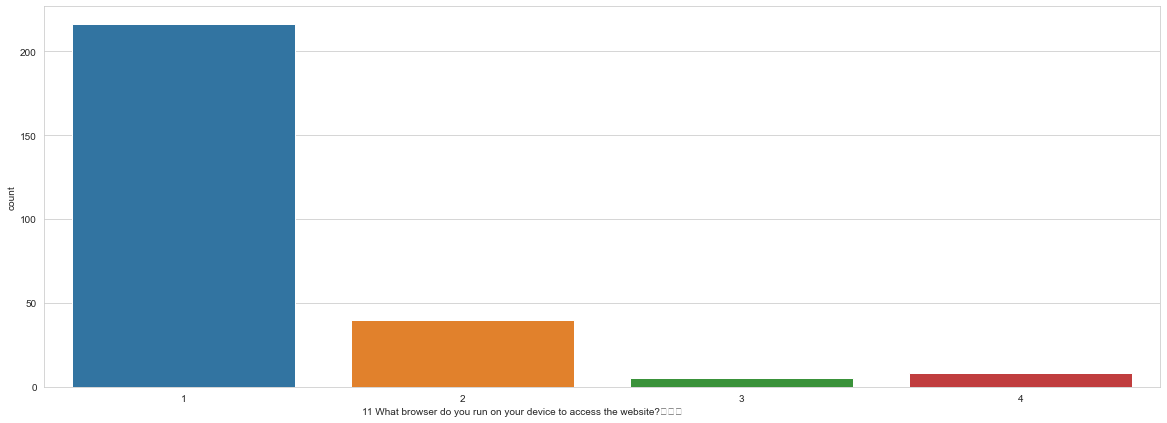

In [25]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='11 What browser do you run on your device to access the website?\t\t\t                                                          ',data=df)

In [26]:
df['11 What browser do you run on your device to access the website?\t\t\t                                                          '].value_counts()

1    216
2     40
4      8
3      5
Name: 11 What browser do you run on your device to access the website?\t\t\t                                                          , dtype: int64

OBSERVATION:
    Most people(80.2%) use the browser '1' to access the website.

<AxesSubplot:xlabel='12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ', ylabel='count'>

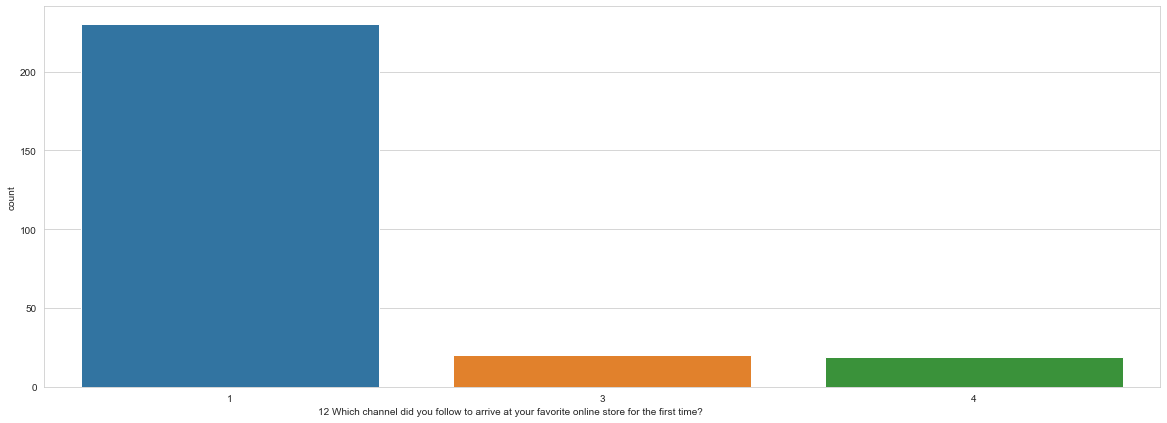

In [27]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',data=df)

In [28]:
df['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   '].value_counts()

1    230
3     20
4     19
Name: 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   , dtype: int64

OBSERVATION: Most people(85.5%) followed channel '1' to arrive at their favorite online store for the first time.

<AxesSubplot:xlabel='13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ', ylabel='count'>

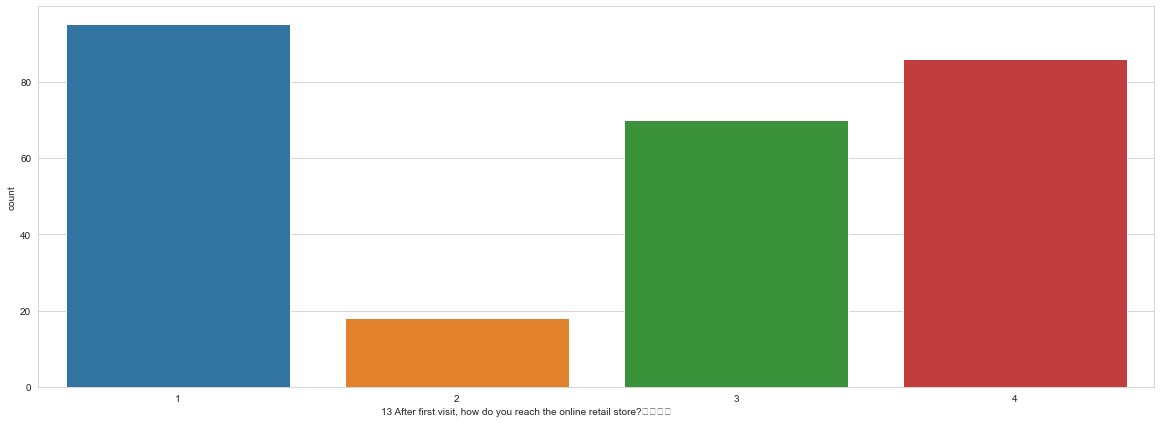

In [29]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',data=df)

In [30]:
df['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '].value_counts()

1    95
4    86
3    70
2    18
Name: 13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   , dtype: int64

OBSERVATION:
    Least number of customers used the category '2' to reach the online retail store.

<AxesSubplot:xlabel='14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ', ylabel='count'>

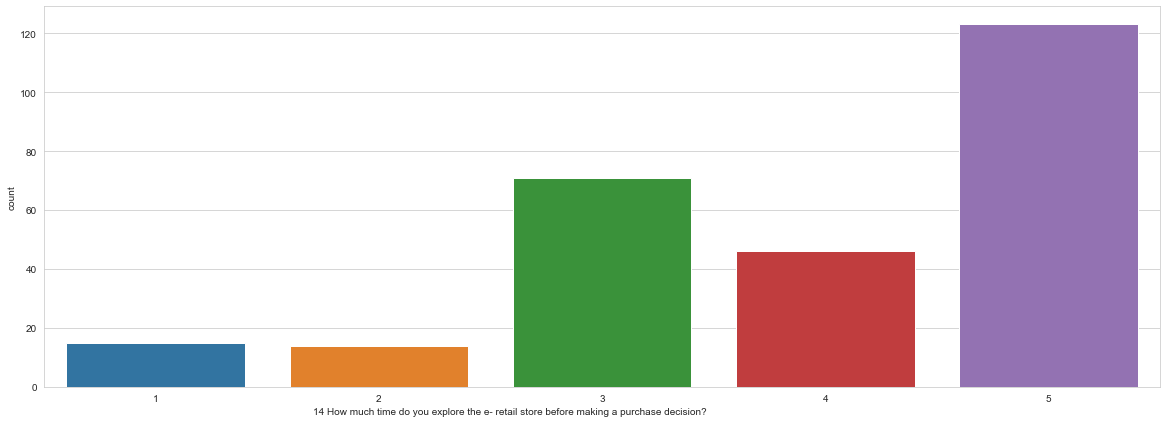

In [31]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',data=df)

In [32]:
df['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '].value_counts()

5    123
3     71
4     46
1     15
2     14
Name: 14 How much time do you explore the e- retail store before making a purchase decision?                                                                   , dtype: int64

OBSERVATION:
    More people(45.7%) spent time in the category '5' before making a purchase decision.

<AxesSubplot:xlabel='15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ', ylabel='count'>

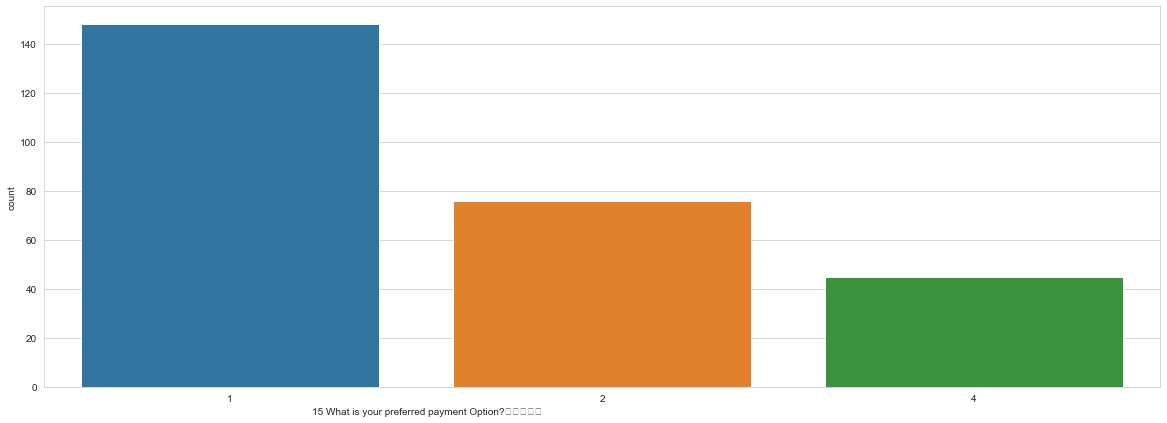

In [33]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ',data=df)

In [34]:
df['15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               '].value_counts()

1    148
2     76
4     45
Name: 15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               , dtype: int64

OBSERVATION:
    Most people(55.01%) use the payment option 1 whereas payment option '4' was used least.

<AxesSubplot:xlabel='16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ', ylabel='count'>

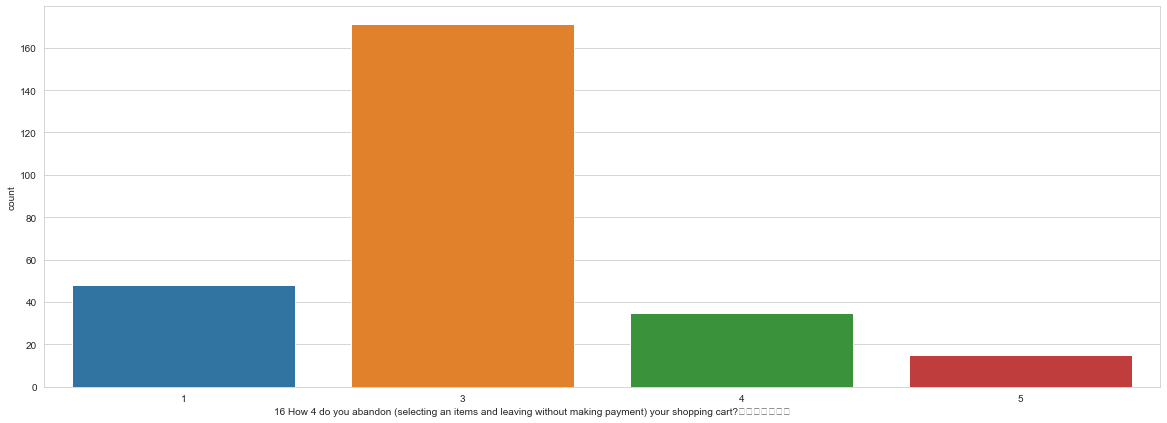

In [35]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ',data=df)

In [36]:
df['16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   '].value_counts()

3    171
1     48
4     35
5     15
Name: 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   , dtype: int64

OBSERVATION:
    Most customers used category '3'in abandoning (selecting an item and leaving without making payment) in their shopping cart.

<AxesSubplot:xlabel='17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ', ylabel='count'>

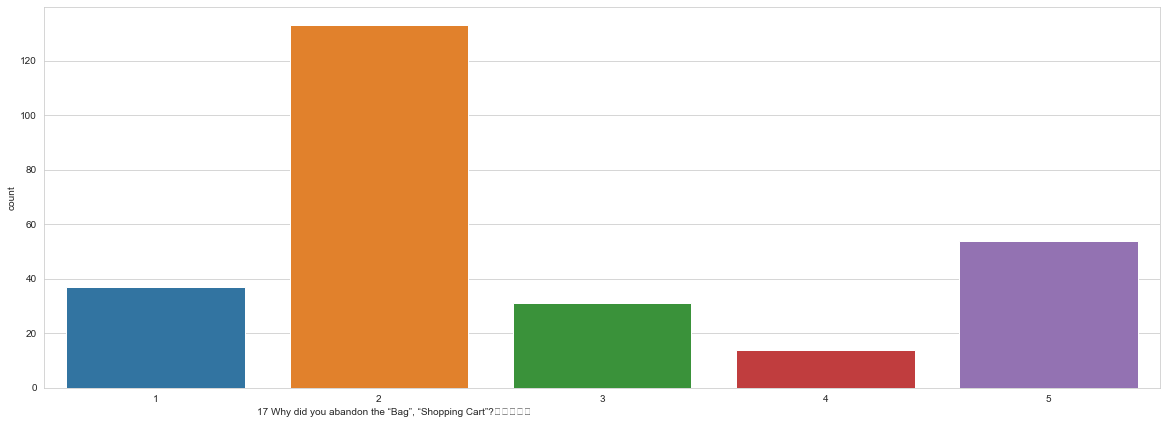

In [37]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ',data=df)

In [38]:
df['17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       '].value_counts()

2    133
5     54
1     37
3     31
4     14
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       , dtype: int64

OBERVATION:
    The reason most customers(49.4%) gave for abandoning their shopping cart was of category '4' whereas category '4' reason had the least count(5.2%).

<AxesSubplot:xlabel='18 The content on the website must be easy to read and understand', ylabel='count'>

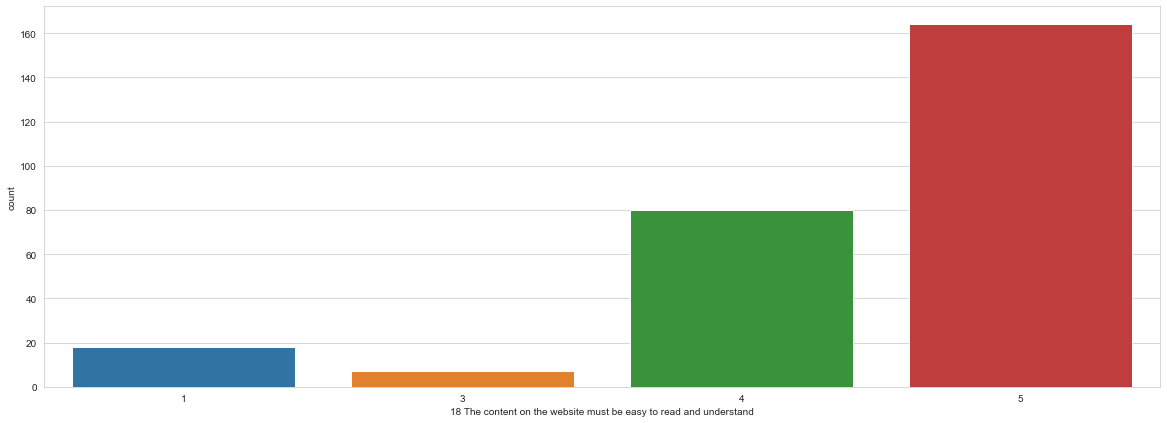

In [39]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='18 The content on the website must be easy to read and understand',data=df)

In [40]:
df['18 The content on the website must be easy to read and understand'].value_counts()

5    164
4     80
1     18
3      7
Name: 18 The content on the website must be easy to read and understand, dtype: int64

OBSERVATION:
   Most customers answers(60.96%) fall under category 5 to the question-The content on the website must be easy to read and understand

<AxesSubplot:xlabel='19 Information on similar product to the one highlighted  is important for product comparison', ylabel='count'>

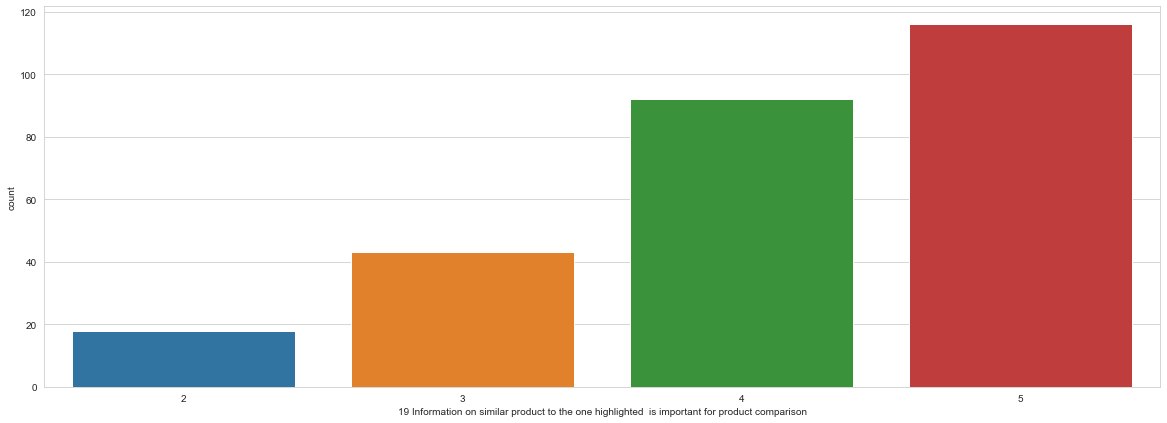

In [41]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='19 Information on similar product to the one highlighted  is important for product comparison',data=df)

In [42]:
df['19 Information on similar product to the one highlighted  is important for product comparison'].value_counts()

5    116
4     92
3     43
2     18
Name: 19 Information on similar product to the one highlighted  is important for product comparison, dtype: int64

OBSERVATION:
    The customer's answers along with the number of customers that answered in that category are:
    category  number
        5    116
        4     92
        3     43
        2     18

<AxesSubplot:xlabel='20 Complete information on listed seller and product being offered is important for purchase decision.', ylabel='count'>

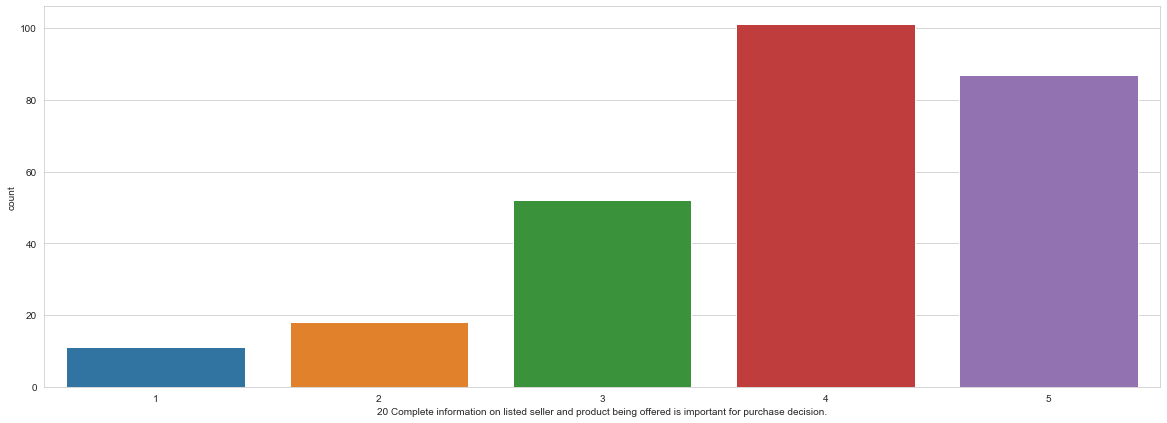

In [43]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='20 Complete information on listed seller and product being offered is important for purchase decision.',data=df)

In [44]:
df['20 Complete information on listed seller and product being offered is important for purchase decision.'].value_counts()

4    101
5     87
3     52
2     18
1     11
Name: 20 Complete information on listed seller and product being offered is important for purchase decision., dtype: int64

OBSERVATION:
    People mostly answered in the category 4(37.54%) and category 5(32.34%) for the column- 20 Complete information on listed seller and product being offered is important for purchase decision.

<AxesSubplot:xlabel='21 All relevant information on listed products must be stated clearly', ylabel='count'>

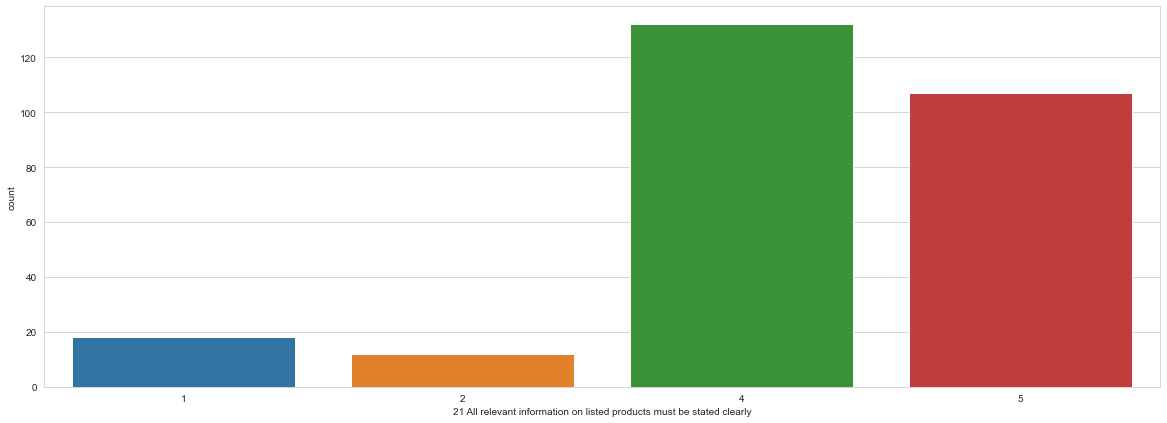

In [45]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='21 All relevant information on listed products must be stated clearly',data=df)

In [46]:
df['21 All relevant information on listed products must be stated clearly'].value_counts()

4    132
5    107
1     18
2     12
Name: 21 All relevant information on listed products must be stated clearly, dtype: int64

OBSERVATION:
    Most customers had an answer in category '4'(49.7%) and category '5'(39.77%) in the feature-21 All relevant information on listed products must be stated clearly

<AxesSubplot:xlabel='22 Ease of navigation in website', ylabel='count'>

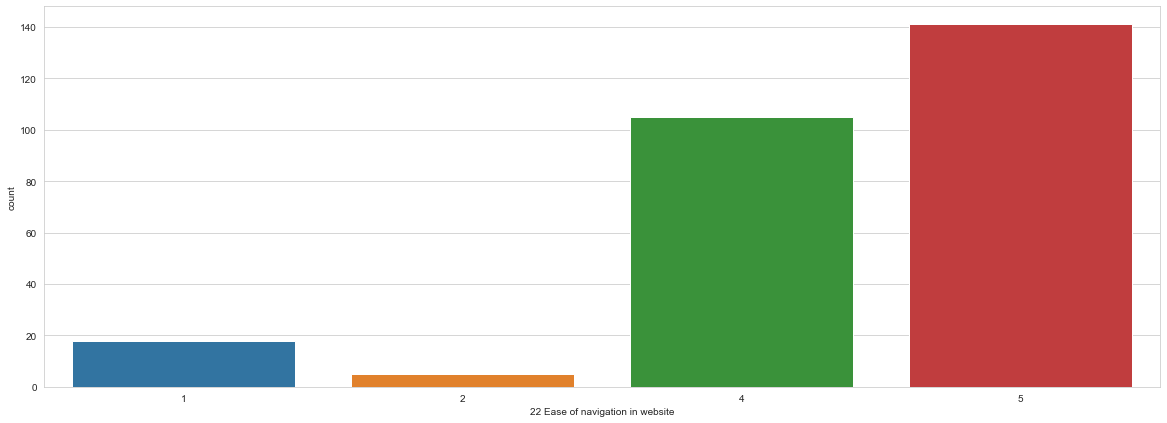

In [47]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='22 Ease of navigation in website',data=df)

In [48]:
df['22 Ease of navigation in website'].value_counts()

5    141
4    105
1     18
2      5
Name: 22 Ease of navigation in website, dtype: int64

OBSERVATION:
    Most customers(56.1%) were under the category '5' whereas customers in the category '2' were the least(1.85%).

<AxesSubplot:xlabel='23 Loading and processing speed', ylabel='count'>

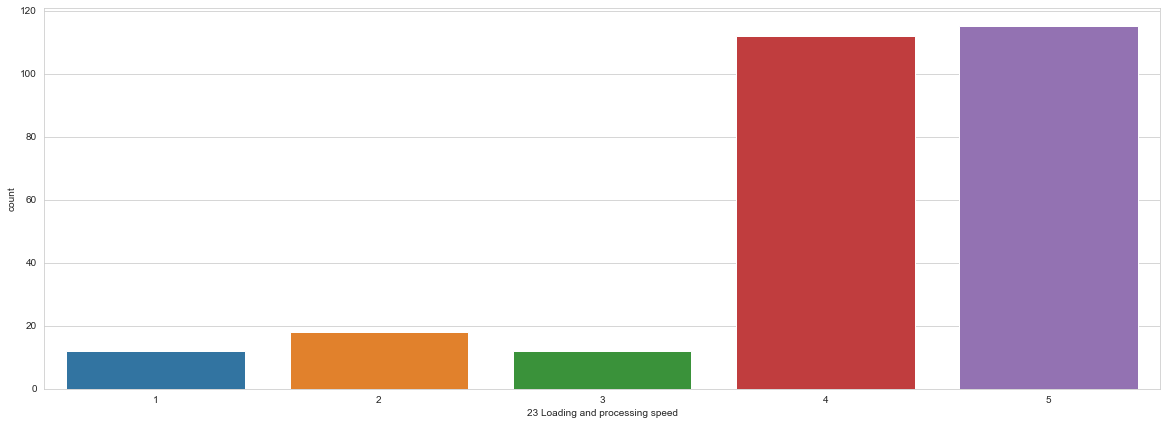

In [49]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='23 Loading and processing speed',data=df)

In [50]:
df['23 Loading and processing speed'].value_counts()

5    115
4    112
2     18
3     12
1     12
Name: 23 Loading and processing speed, dtype: int64

<AxesSubplot:xlabel='24 User friendly Interface of the website', ylabel='count'>

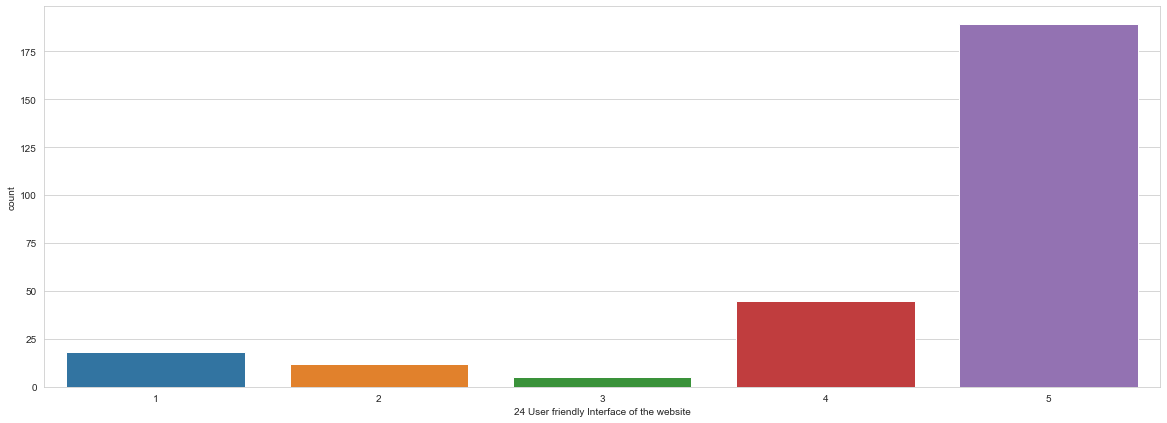

In [51]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='24 User friendly Interface of the website',data=df)

In [52]:
df['24 User friendly Interface of the website'].value_counts()

5    189
4     45
1     18
2     12
3      5
Name: 24 User friendly Interface of the website, dtype: int64

OBSERVATION:
    Most customers(70.26%) response was in category '5' for the column-24 User friendly Interface of the website.

<AxesSubplot:xlabel='25 Convenient Payment methods', ylabel='count'>

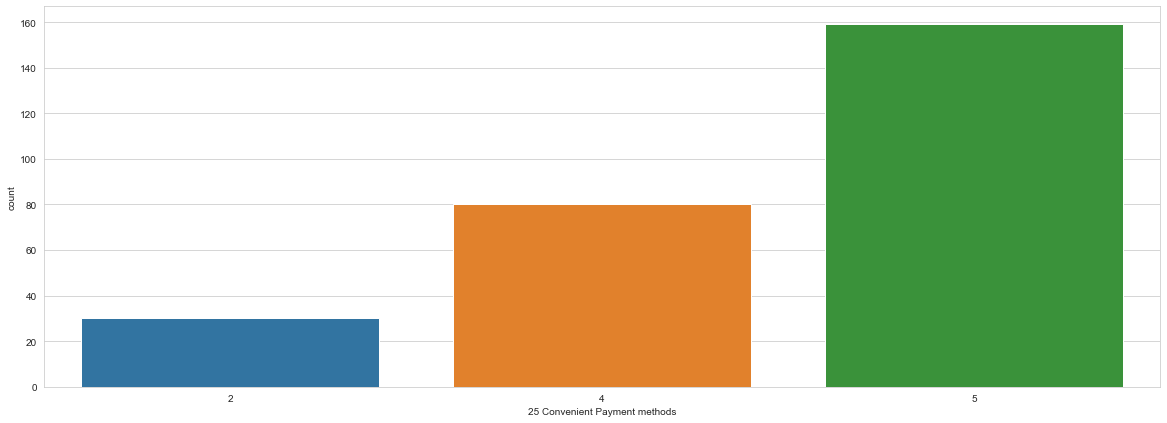

In [53]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='25 Convenient Payment methods',data=df)

In [54]:
df['25 Convenient Payment methods'].value_counts()

5    159
4     80
2     30
Name: 25 Convenient Payment methods, dtype: int64

OBSERVATIONS:
    Most customers(59.10%) gave a response of category '5' for the feature-25 Convenient Payment methods.

<AxesSubplot:xlabel='26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time', ylabel='count'>

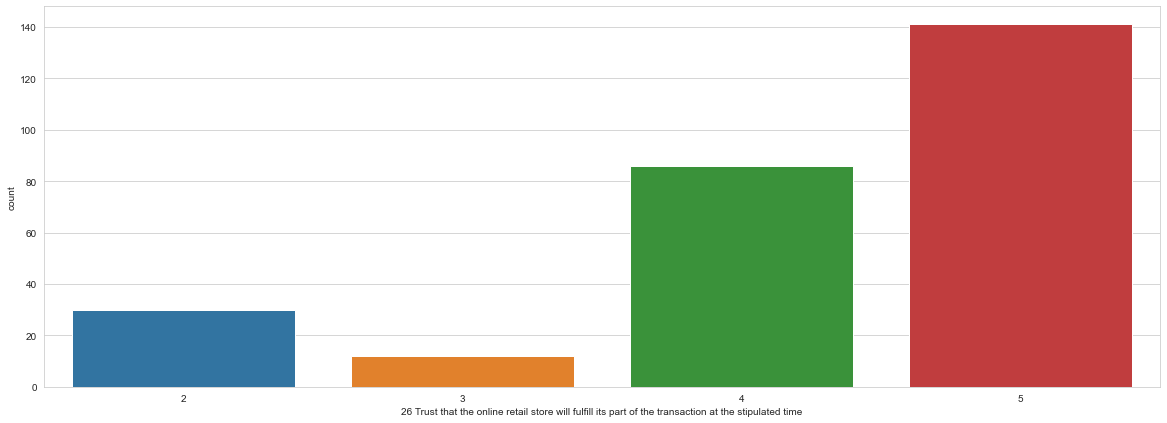

In [55]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',data=df)

In [56]:
df['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'].value_counts()

5    141
4     86
2     30
3     12
Name: 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time, dtype: int64

OBSERVATION:
    Most customers(51%) answered in category '5' for the feature-26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time.

<AxesSubplot:xlabel='27 Empathy (readiness to assist with queries) towards the customers', ylabel='count'>

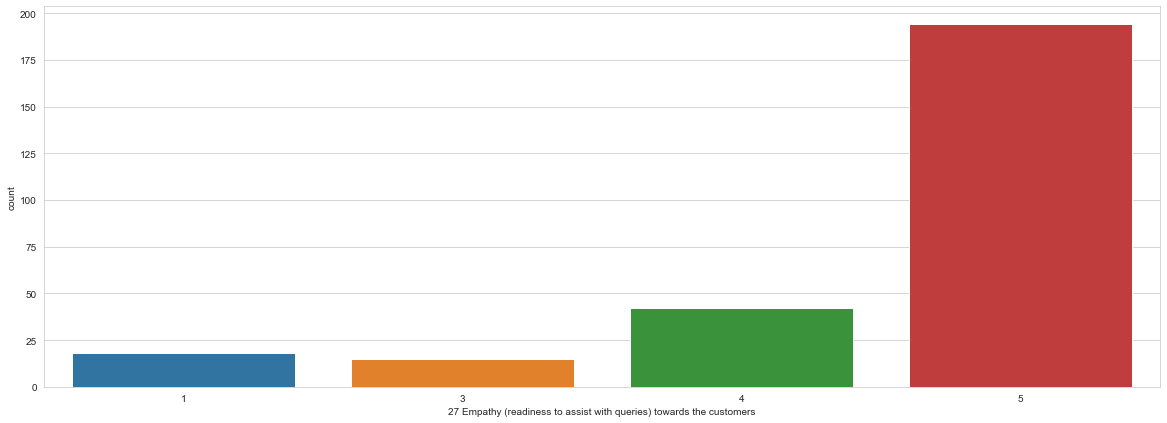

In [57]:
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='27 Empathy (readiness to assist with queries) towards the customers',data=df)

In [58]:
df['27 Empathy (readiness to assist with queries) towards the customers'].value_counts()

5    194
4     42
1     18
3     15
Name: 27 Empathy (readiness to assist with queries) towards the customers, dtype: int64

OBSERVATION:
    Most customers(72.11%) had an answer in category '5' for the feature-27 Empathy (readiness to assist with queries) towards the customers.

<AxesSubplot:xlabel='28 Being able to guarantee the privacy of the customer', ylabel='count'>

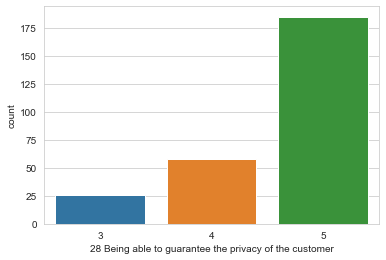

In [59]:
#plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='28 Being able to guarantee the privacy of the customer',data=df)

In [60]:
df['28 Being able to guarantee the privacy of the customer'].value_counts()

5    185
4     58
3     26
Name: 28 Being able to guarantee the privacy of the customer, dtype: int64

<AxesSubplot:xlabel='29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)', ylabel='count'>

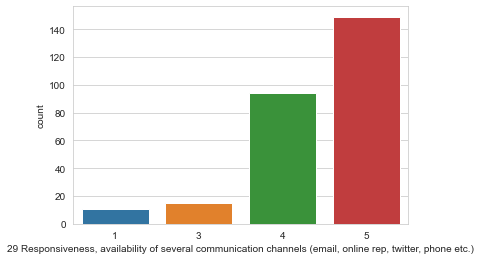

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',data=df)

In [62]:
df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'].value_counts()

5    149
4     94
3     15
1     11
Name: 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: int64

OBSERVATION:
    Most customers(55.39%) fell under category 5 whereas least(4.089%) fell under the category '1' for the feature-29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)

<AxesSubplot:xlabel='30 Online shopping gives monetary benefit and discounts', ylabel='count'>

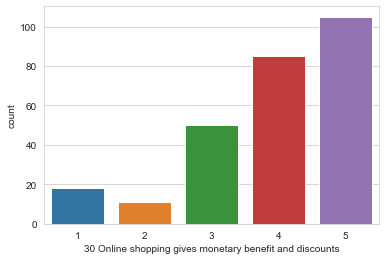

In [63]:
sns.set_style('whitegrid')
sns.countplot(x='30 Online shopping gives monetary benefit and discounts',data=df)

In [64]:
df['30 Online shopping gives monetary benefit and discounts'].value_counts()

5    105
4     85
3     50
1     18
2     11
Name: 30 Online shopping gives monetary benefit and discounts, dtype: int64

OBSERVATION:
    Most customers(39.03%) were in  category 5 whereas the least(4.1%) were in category 2 for the feature-30 Online shopping gives monetary benefit and discounts. 

<AxesSubplot:xlabel='31 Enjoyment is derived from shopping online', ylabel='count'>

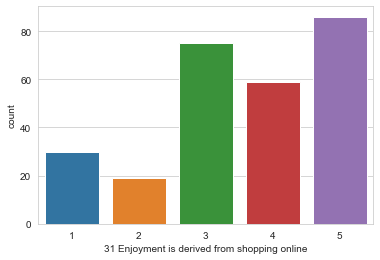

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='31 Enjoyment is derived from shopping online',data=df)

In [66]:
df['31 Enjoyment is derived from shopping online'].value_counts()

5    86
3    75
4    59
1    30
2    19
Name: 31 Enjoyment is derived from shopping online, dtype: int64

OBSERVATION:
        Most customers(31.9%) were in category 5 followed by category 4(27.9%) for the feature-31 Enjoyment is derived from shopping online.

<AxesSubplot:xlabel='32 Shopping online is convenient and flexible', ylabel='count'>

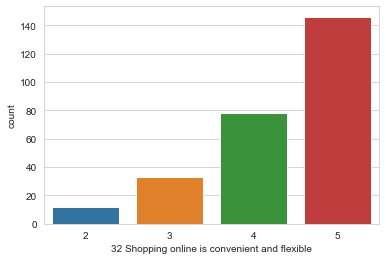

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='32 Shopping online is convenient and flexible',data=df)

In [68]:
df['32 Shopping online is convenient and flexible'].value_counts()

5    146
4     78
3     33
2     12
Name: 32 Shopping online is convenient and flexible, dtype: int64

OBSERVATION:
    The majority of customers were in category '5'.An upward trend was seen in counts of customers in categories 2-5 in the feature -32.

<AxesSubplot:xlabel='33 Return and replacement policy of the e-tailer is important for purchase decision', ylabel='count'>

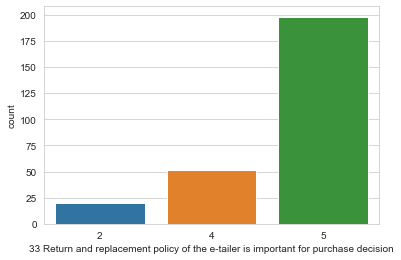

In [69]:
sns.set_style('whitegrid')
sns.countplot(x='33 Return and replacement policy of the e-tailer is important for purchase decision',data=df)

In [70]:
df['33 Return and replacement policy of the e-tailer is important for purchase decision'].value_counts()

5    198
4     51
2     20
Name: 33 Return and replacement policy of the e-tailer is important for purchase decision, dtype: int64

OBSERVATION:
    Most customers(73.6%) were in category 5.

<AxesSubplot:xlabel='34 Gaining access to loyalty programs is a benefit of shopping online', ylabel='count'>

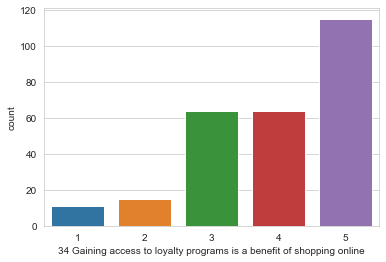

In [71]:
sns.set_style('whitegrid')
sns.countplot(x='34 Gaining access to loyalty programs is a benefit of shopping online',data=df)

In [72]:
df['34 Gaining access to loyalty programs is a benefit of shopping online'].value_counts()

5    115
4     64
3     64
2     15
1     11
Name: 34 Gaining access to loyalty programs is a benefit of shopping online, dtype: int64

OBSERVATIONS:
    1)most customers were in categories 5.
    2)An upward trend was seen in categories 1-5 of the feature-34

<AxesSubplot:xlabel='35 Displaying quality Information on the website improves satisfaction of customers', ylabel='count'>

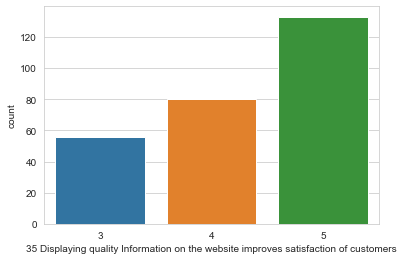

In [73]:
sns.set_style('whitegrid')
sns.countplot(x='35 Displaying quality Information on the website improves satisfaction of customers',data=df)

In [74]:
df['35 Displaying quality Information on the website improves satisfaction of customers'].value_counts()

5    133
4     80
3     56
Name: 35 Displaying quality Information on the website improves satisfaction of customers, dtype: int64

OBSERVATION:
    An upward trend was seen in categories 3,4,5 with 5 having the most counts(50%) of customer responses.

<AxesSubplot:xlabel='36 User derive satisfaction while shopping on a good quality website or application', ylabel='count'>

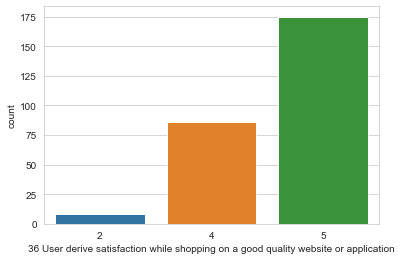

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='36 User derive satisfaction while shopping on a good quality website or application',data=df)

In [76]:
df['36 User derive satisfaction while shopping on a good quality website or application'].value_counts()

5    175
4     86
2      8
Name: 36 User derive satisfaction while shopping on a good quality website or application, dtype: int64

OBSERVATION:
    1)Most customers were in category 5.
    2)An upward trend was seen from categories 2 to 5 in feature-36.

<AxesSubplot:xlabel='37 Net Benefit derived from shopping online can lead to users satisfaction', ylabel='count'>

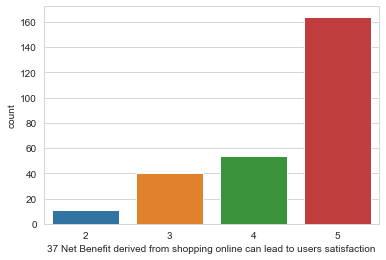

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='37 Net Benefit derived from shopping online can lead to users satisfaction',data=df)

In [78]:
df['37 Net Benefit derived from shopping online can lead to users satisfaction'].value_counts()

5    164
4     54
3     40
2     11
Name: 37 Net Benefit derived from shopping online can lead to users satisfaction, dtype: int64

OBSERVATION:
    1)Most customers(60.96%) were in category 5.
    2)An upward trend was observed in categories 2-5.

<AxesSubplot:xlabel='38 User satisfaction cannot exist without trust', ylabel='count'>

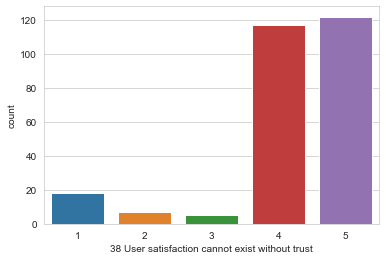

In [80]:
sns.set_style('whitegrid')
sns.countplot(x='38 User satisfaction cannot exist without trust',data=df)

In [81]:
df['38 User satisfaction cannot exist without trust'].value_counts()

5    122
4    117
1     18
2      7
3      5
Name: 38 User satisfaction cannot exist without trust, dtype: int64

OBSERVATION:
    Most customers were under the category 5(45.35%) and category 4(43.49%).

<AxesSubplot:xlabel='39 Offering a wide variety of listed product in several category', ylabel='count'>

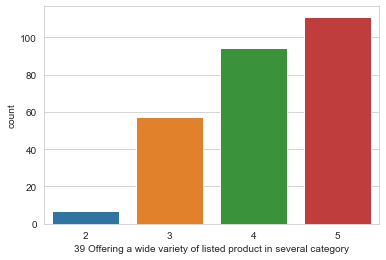

In [83]:
sns.set_style('whitegrid')
sns.countplot(x='39 Offering a wide variety of listed product in several category',data=df)

In [84]:
df['39 Offering a wide variety of listed product in several category'].value_counts()

5    111
4     94
3     57
2      7
Name: 39 Offering a wide variety of listed product in several category, dtype: int64

OBSERVATION:
    More customers(41.26%) were under the category '5' whereas least amount(2.6%) of customers fell under category '2'.
    

<AxesSubplot:xlabel='40 Provision of complete and relevant product information', ylabel='count'>

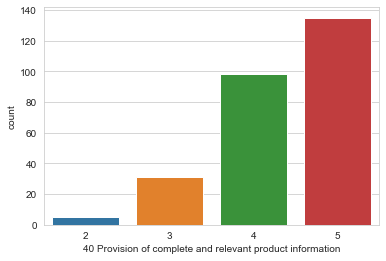

In [86]:
sns.set_style('whitegrid')
sns.countplot(x='40 Provision of complete and relevant product information',data=df)

In [87]:
df['40 Provision of complete and relevant product information'].value_counts()

5    135
4     98
3     31
2      5
Name: 40 Provision of complete and relevant product information, dtype: int64

OBSERVATION:
    Most customers(50.1%) fell in category '5' and the least(0.74%) in category '2'.
    An upward trend was observed in categories 2-5 respectively.

<AxesSubplot:xlabel='41 Monetary savings', ylabel='count'>

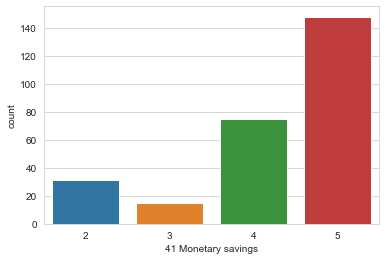

In [89]:
sns.set_style('whitegrid')
sns.countplot(x='41 Monetary savings',data=df)

In [90]:
df['42 The Convenience of patronizing the online retailer'].value_counts()

4    138
3     77
5     54
Name: 42 The Convenience of patronizing the online retailer, dtype: int64

OBSERVATION:
    most people(over 50% ) were in category '4'.

<AxesSubplot:xlabel='43 Shopping on the website gives you the sense of adventure', ylabel='count'>

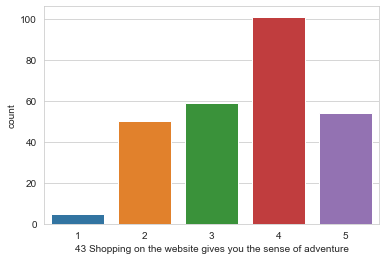

In [92]:
sns.set_style('whitegrid')
sns.countplot(x='43 Shopping on the website gives you the sense of adventure',data=df)

In [93]:
df['43 Shopping on the website gives you the sense of adventure'].value_counts()

4    101
3     59
5     54
2     50
1      5
Name: 43 Shopping on the website gives you the sense of adventure, dtype: int64

OBSERVATION:
    Most customers(37.54%) were in category '4' whereas least number(1.9%) of people were in category 1.

<AxesSubplot:xlabel='44 Shopping on your preferred e-tailer enhances your social status', ylabel='count'>

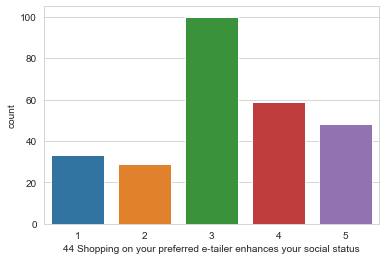

In [95]:
sns.set_style('whitegrid')
sns.countplot(x='44 Shopping on your preferred e-tailer enhances your social status',data=df)

In [96]:
df['44 Shopping on your preferred e-tailer enhances your social status'].value_counts()

3    100
4     59
5     48
1     33
2     29
Name: 44 Shopping on your preferred e-tailer enhances your social status, dtype: int64

OBSERVATION:
    1)Most customers(37.1%) were in category '3'.

<AxesSubplot:xlabel='45 You feel gratification shopping on your favorite e-tailer', ylabel='count'>

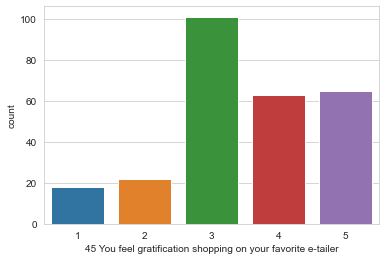

In [98]:
sns.set_style('whitegrid')
sns.countplot(x='45 You feel gratification shopping on your favorite e-tailer',data=df)

In [99]:
df['45 You feel gratification shopping on your favorite e-tailer'].value_counts()

3    101
5     65
4     63
2     22
1     18
Name: 45 You feel gratification shopping on your favorite e-tailer, dtype: int64

OBSERVATION:
    Most customers were in category 3(38% approx) in the column-45.

<AxesSubplot:xlabel='46 Shopping on the website helps you fulfill certain roles', ylabel='count'>

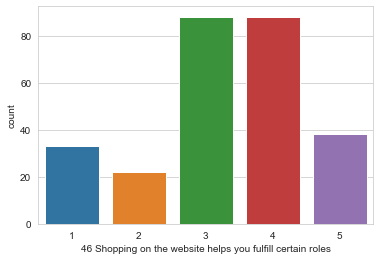

In [101]:
sns.set_style('whitegrid')
sns.countplot(x='46 Shopping on the website helps you fulfill certain roles',data=df)

In [102]:
df['46 Shopping on the website helps you fulfill certain roles'].value_counts()

4    88
3    88
5    38
1    33
2    22
Name: 46 Shopping on the website helps you fulfill certain roles, dtype: int64

OBSERVATION:
    Most customers(32.7%) were in category '3' and category '4' in for the feature-46

<AxesSubplot:xlabel='47 Getting value for money spent', ylabel='count'>

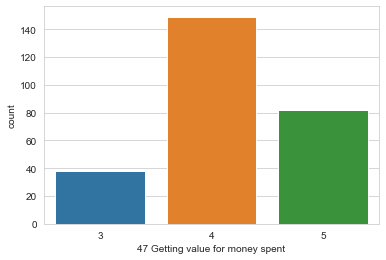

In [104]:
sns.set_style('whitegrid')
sns.countplot(x='47 Getting value for money spent',data=df)

In [105]:
df['47 Getting value for money spent'].value_counts()

4    149
5     82
3     38
Name: 47 Getting value for money spent, dtype: int64

OBSERVATIONS:
    Most customers(55.39%) were under the category '4'.

<AxesSubplot:xlabel='From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ', ylabel='count'>

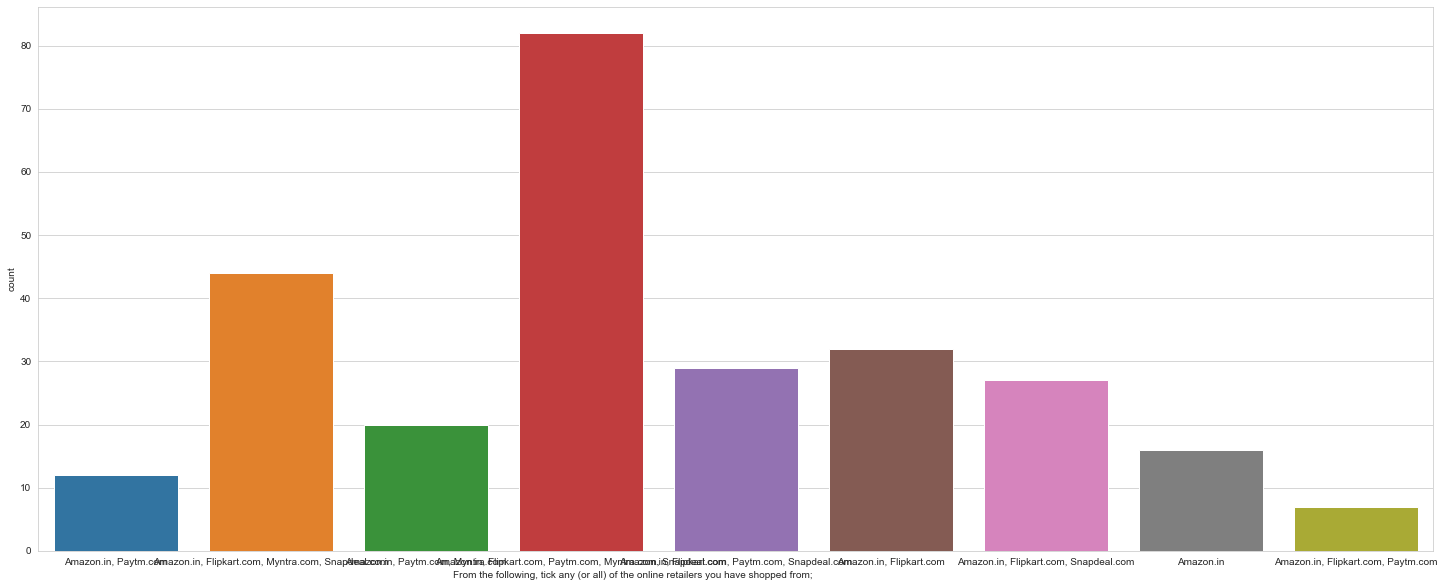

In [109]:

plt.figure(figsize=(25,10))
sns.set_style('whitegrid')
sns.countplot(x='From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ',data=df)

In [110]:
df['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           '].value_counts()

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: From the following, tick any (or all) of the online retailers you have shopped from;                                                                           , dtype: int64

OBSERVATION:
    1)Most customers shopped from category'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'.
    2)Least customers(2.6%) were in category 'Amazon.in, Flipkart.com, Paytm.com'.

<AxesSubplot:xlabel='Easy to use website or application', ylabel='count'>

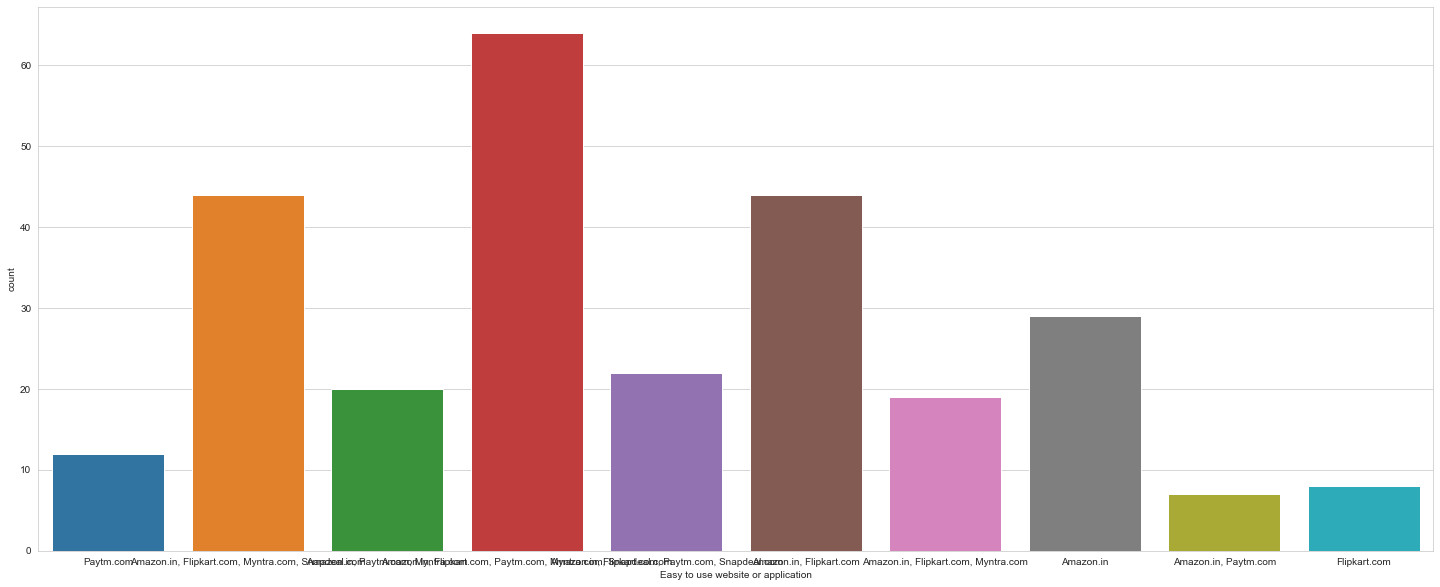

In [112]:
plt.figure(figsize=(25,10))
sns.set_style('whitegrid')
sns.countplot(x='Easy to use website or application',data=df)

In [113]:
df['Easy to use website or application'].value_counts()

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com                                         44
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy to use website or application, dtype: int64

OBSERVATION:
    Most customers(23.79%) termed the easy to use website as 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com' where as 'Amazon.in, Paytm.com' category was the least.(2.6%)

<AxesSubplot:xlabel='Visual appealing web-page layout', ylabel='count'>

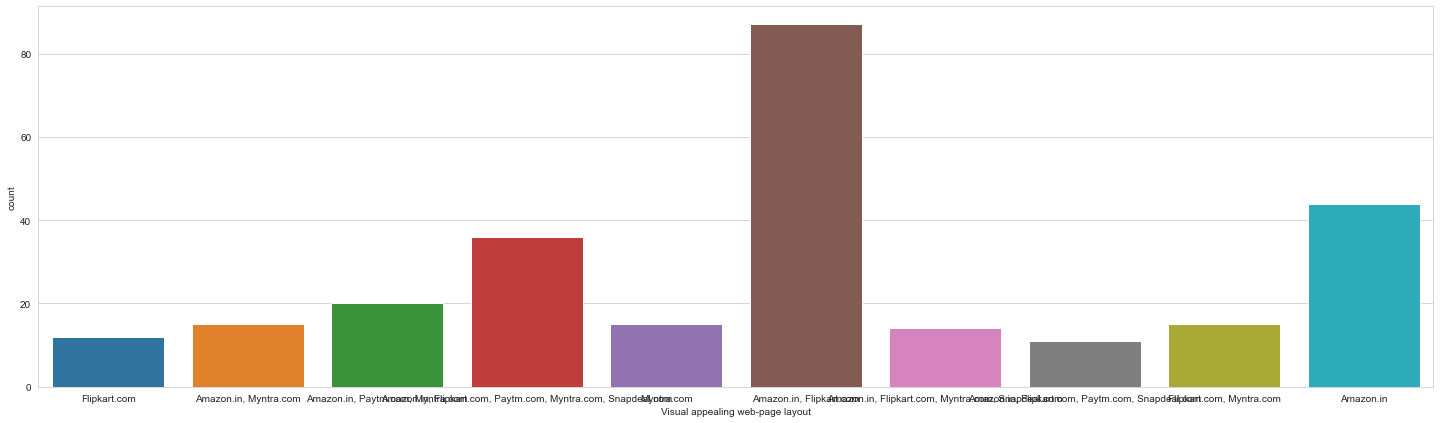

In [116]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Visual appealing web-page layout',data=df)

In [117]:
df['Visual appealing web-page layout'].value_counts()

Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Flipkart.com, Myntra.com                                        15
Myntra.com                                                      15
Amazon.in, Myntra.com                                           15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visual appealing web-page layout, dtype: int64

OBSERVATION:
    Most customers(32.34%) were under the category 'Amazon.in, Flipkart.com'.

<AxesSubplot:xlabel='Complete, relevant description information of products', ylabel='count'>

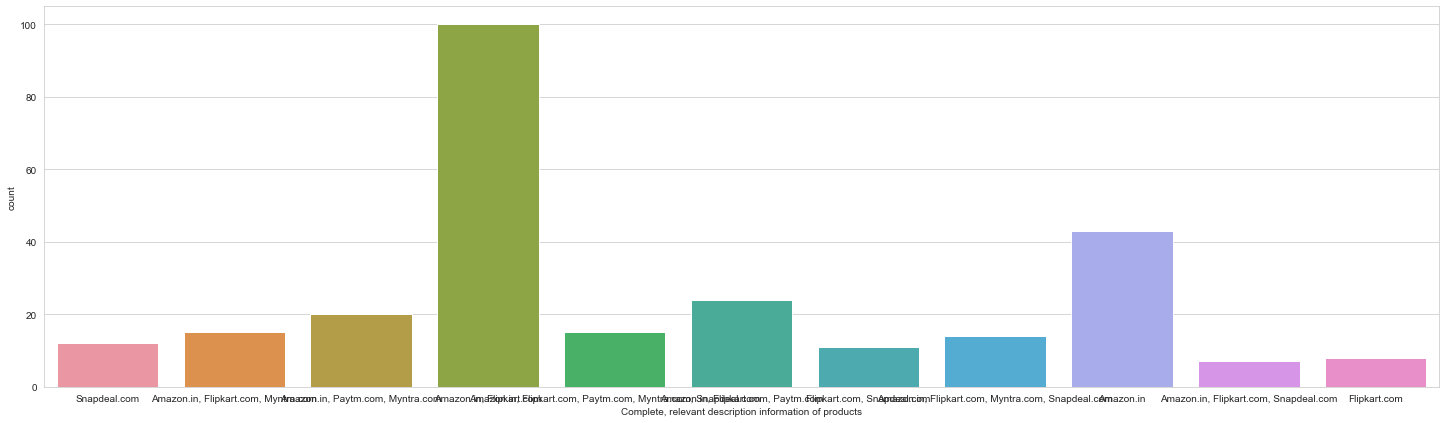

In [119]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Complete, relevant description information of products',data=df)

In [120]:
df['Complete, relevant description information of products'].value_counts()

Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete, relevant description information of products, dtype: int64

OBSERVATION:
    Most Customers(37.14%) were in category 'Amazon.in, Flipkart.com' whereas the least(3%) in categories-'Flipkart.com' and                                                       8
'Amazon.in, Flipkart.com, Snapdeal.com '

<AxesSubplot:xlabel='Fast loading website speed of website and application', ylabel='count'>

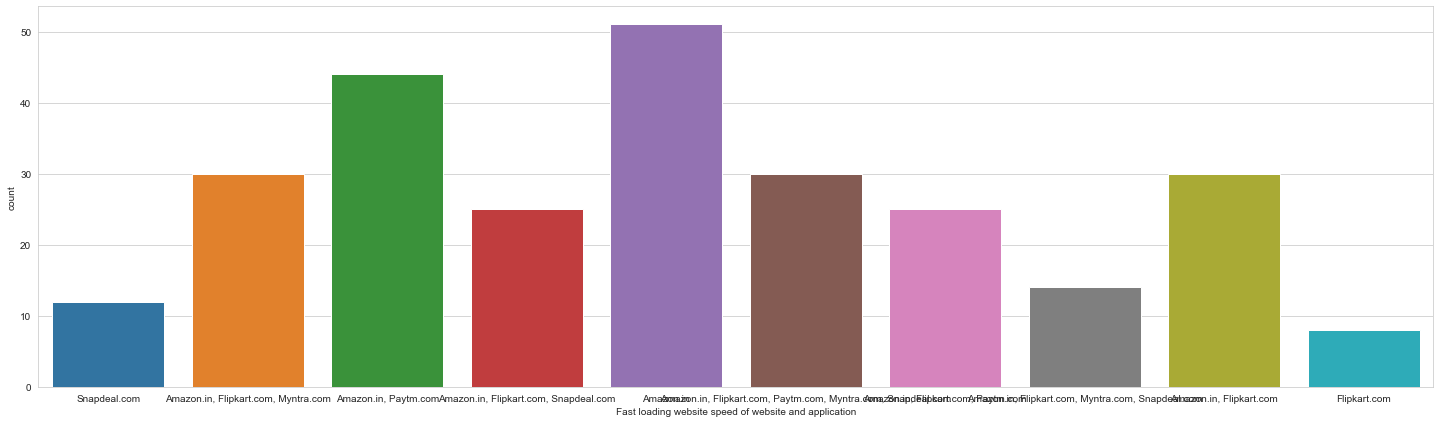

In [122]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Fast loading website speed of website and application',data=df)

In [123]:
df['Fast loading website speed of website and application'].value_counts()

Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast loading website speed of website and application, dtype: int64

<AxesSubplot:xlabel='Reliability of the website or application', ylabel='count'>

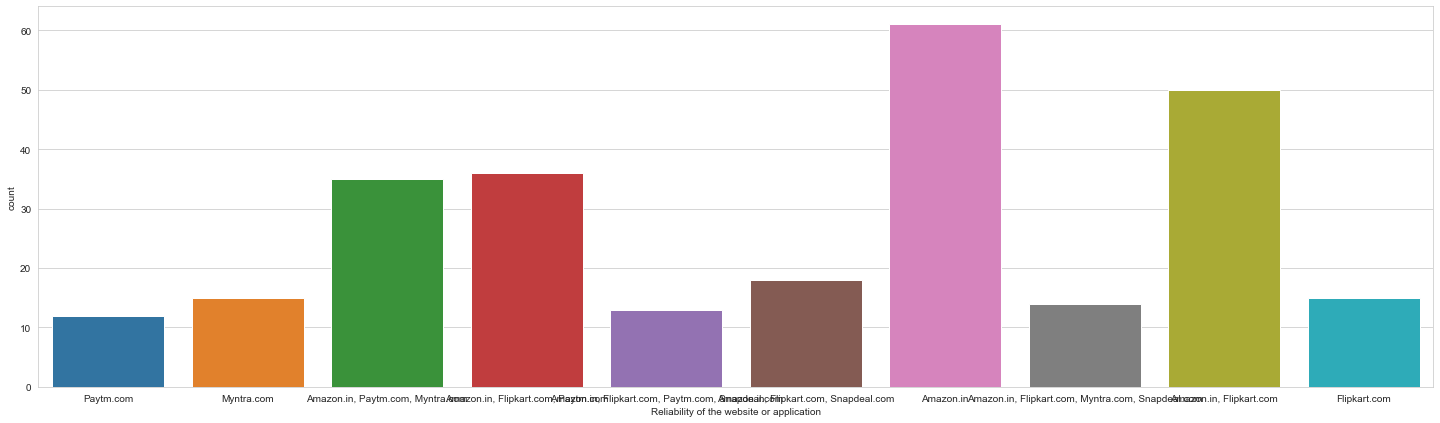

In [125]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Reliability of the website or application',data=df)

In [126]:
df['Reliability of the website or application'].value_counts()

Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Flipkart.com                                         15
Myntra.com                                           15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Reliability of the website or application, dtype: int64

OBSERVATION:
    More customers(22.67%) responses were in category 'Amazon.in' and the least(4.46%) in 'Paytm.com'.

<AxesSubplot:xlabel='Quickness to complete purchase', ylabel='count'>

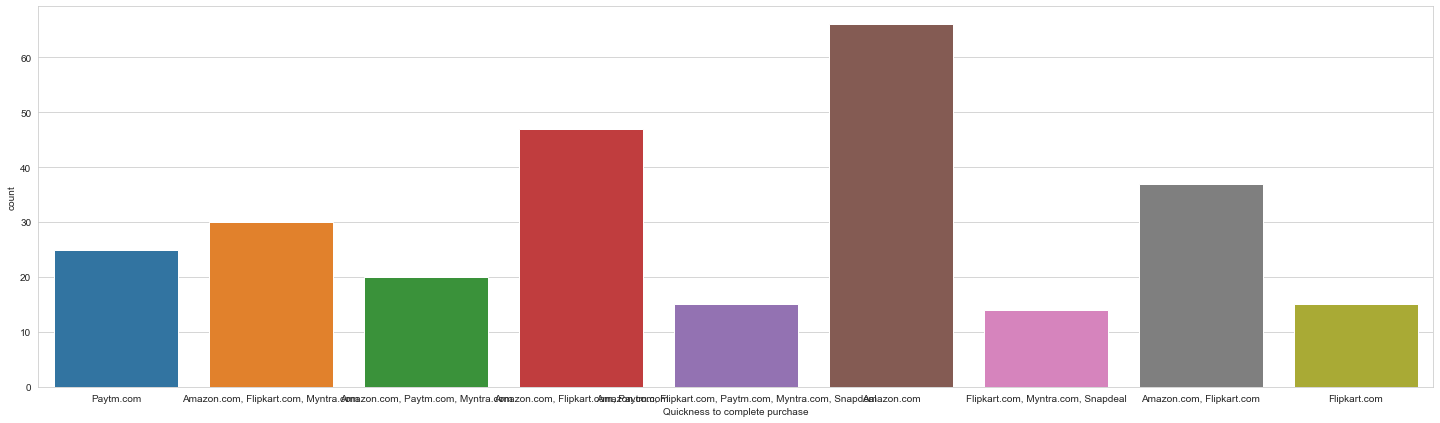

In [128]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Quickness to complete purchase',data=df)

In [129]:
df['Quickness to complete purchase'].value_counts()

Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com                                                 15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness to complete purchase, dtype: int64

OBSERVATIONS:
    More customers(24.5%) responses  were in category 'Amazon.com' and the least(5.2%) in 'Flipkart.com, Myntra.com, Snapdeal'.

<AxesSubplot:xlabel='Quickness to complete purchase', ylabel='count'>

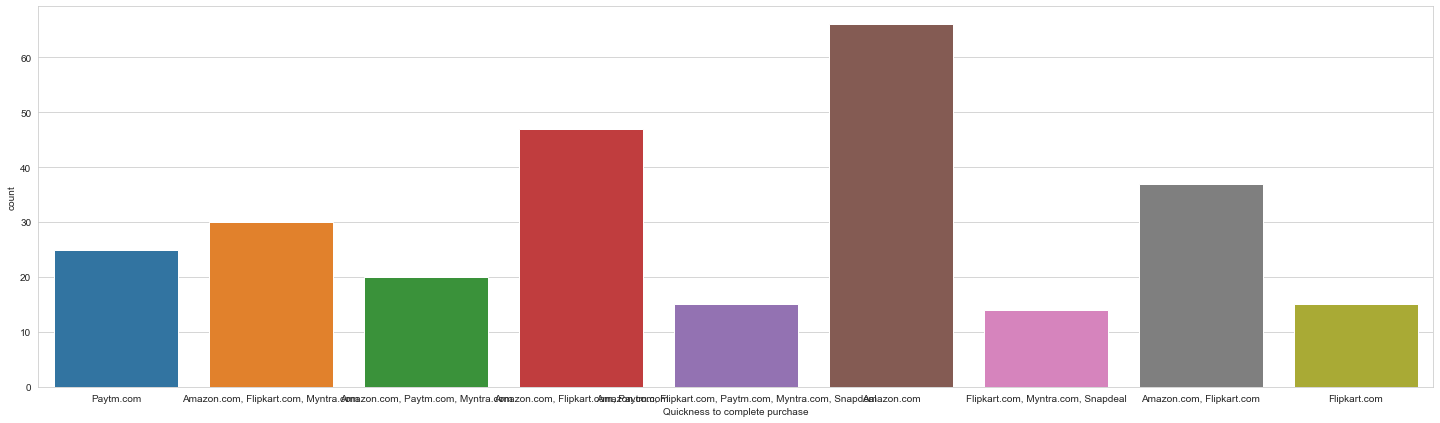

In [131]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Quickness to complete purchase',data=df)

In [132]:
df['Quickness to complete purchase'].value_counts()

Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com                                                 15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness to complete purchase, dtype: int64

OBSERVATION:
    More customers(24.5%) were in category 'Amazon.com' and the least(5.2%) in category 'Flipkart.com, Myntra.com, Snapdeal'.

<AxesSubplot:xlabel='Availability of several payment options', ylabel='count'>

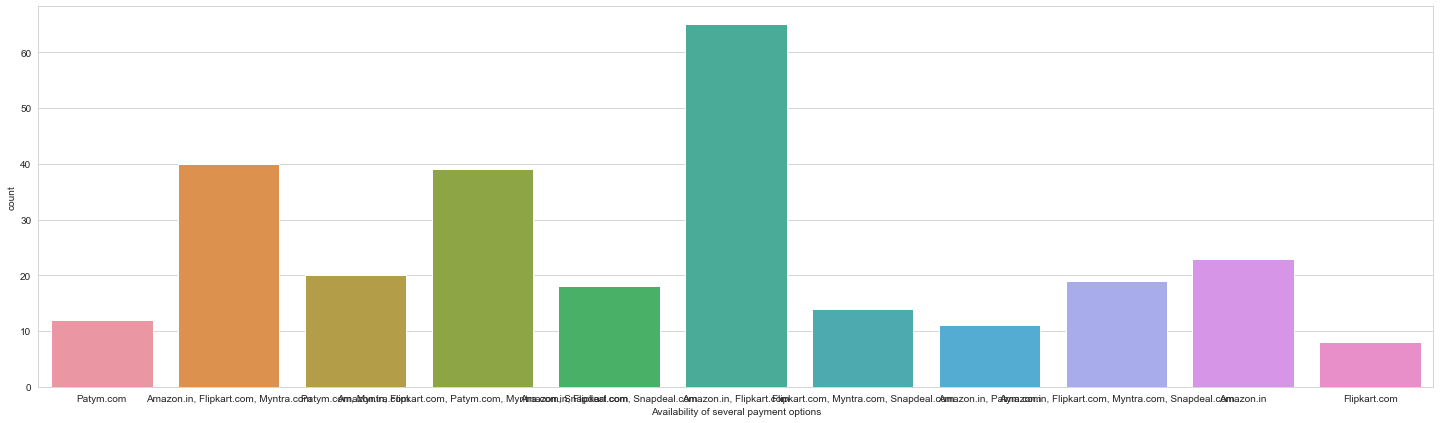

In [134]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Availability of several payment options',data=df)

In [135]:
df['Availability of several payment options'].value_counts()

Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: Availability of several payment options, dtype: int64

OBSERVATION:
    Most customers(24.16%) were in category 'Amazon.in, Flipkart.com' and the least(3%) in 'Flipkart.com'.

<AxesSubplot:xlabel='Speedy order delivery ', ylabel='count'>

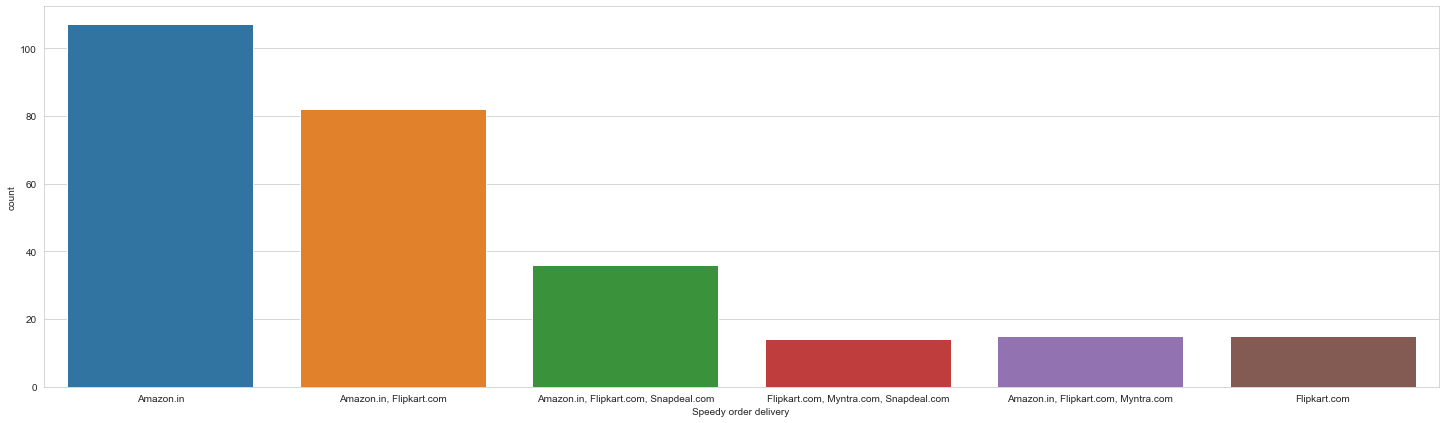

In [137]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Speedy order delivery ',data=df)

In [138]:
df['Speedy order delivery '].value_counts()

Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Speedy order delivery , dtype: int64

OBSERVATIONS:
    1)Most customers were in category 'Amazon.in' and the least in 'Flipkart.com, Myntra.com, Snapdeal.com'.
    2)A downward trend was observed in the order 'Amazon.in', 'Amazon.in, Flipkart.com',
       'Amazon.in, Flipkart.com, Snapdeal.com',
       'Flipkart.com, Myntra.com, Snapdeal.com',
       'Amazon.in, Flipkart.com, Myntra.com', 'Flipkart.com'

<AxesSubplot:xlabel='Privacy of customers’ information', ylabel='count'>

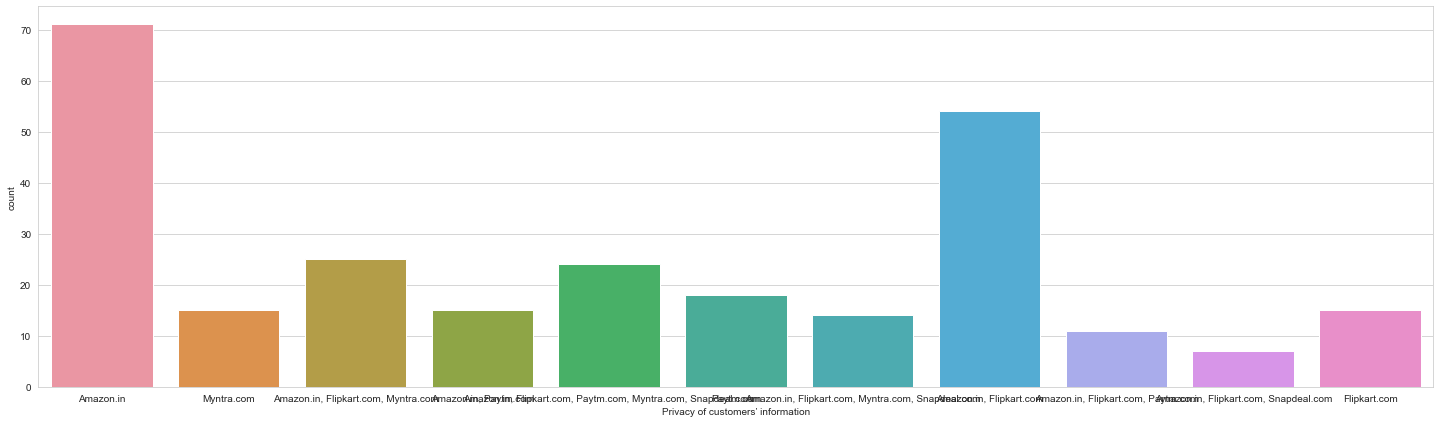

In [141]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Privacy of customers’ information',data=df)

In [142]:
df['Privacy of customers’ information'].value_counts()

Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Amazon.in, Paytm.com                                            15
Flipkart.com                                                    15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Privacy of customers’ information, dtype: int64

OBSERVATION:
    Most customers(26.39%) were in the category 'Amazon.in' and the least(2.6%) in 'Amazon.in, Flipkart.com, Snapdeal.com'.

<AxesSubplot:xlabel='Security of customer financial information', ylabel='count'>

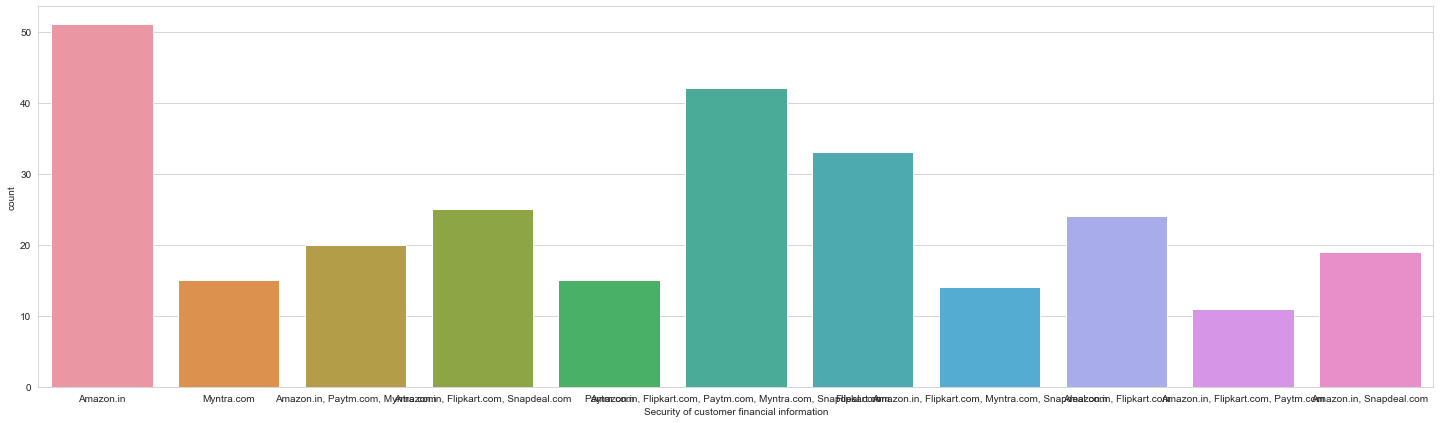

In [144]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Security of customer financial information',data=df)

In [145]:
df['Security of customer financial information'].value_counts()

Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Paytm.com                                                       15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Security of customer financial information, dtype: int64

OBSERVATION:
    More customers(19%%) were in the category 'Amazon.in' and the least(less than 10%) in 'Amazon.in, Flipkart.com, Paytm.com'.

<AxesSubplot:xlabel='Perceived Trustworthiness', ylabel='count'>

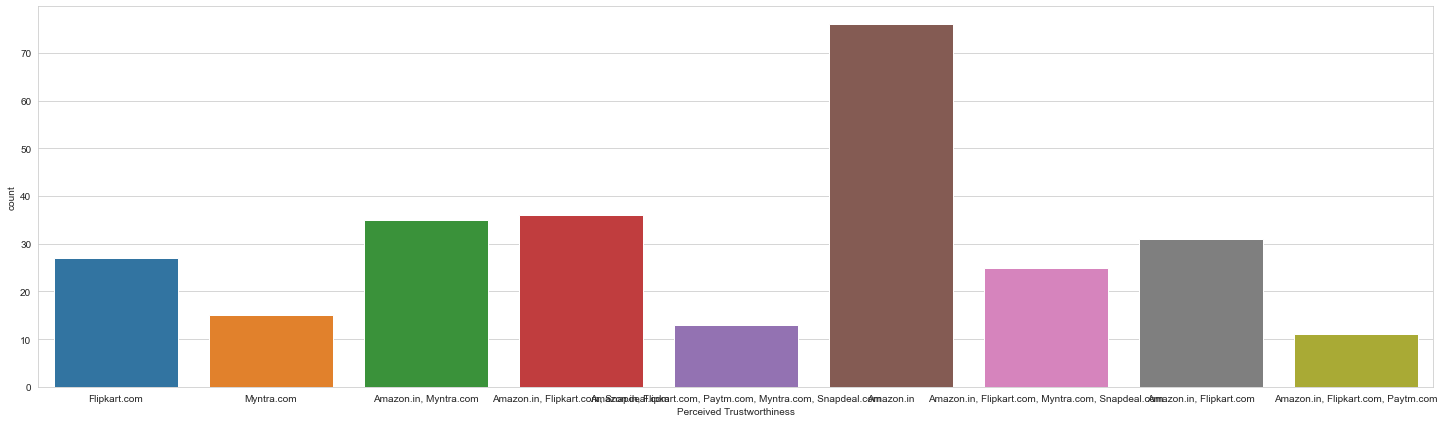

In [147]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Perceived Trustworthiness',data=df)

In [148]:
df['Perceived Trustworthiness'].value_counts()

Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived Trustworthiness, dtype: int64

OBSERVATIONS:
    Most customer responses(28.25%) were in the category 'Amazon.in' and the least(4.1%) in 'Amazon.in, Flipkart.com, Paytm.com'.

<AxesSubplot:xlabel='Presence of online assistance through multi-channel', ylabel='count'>

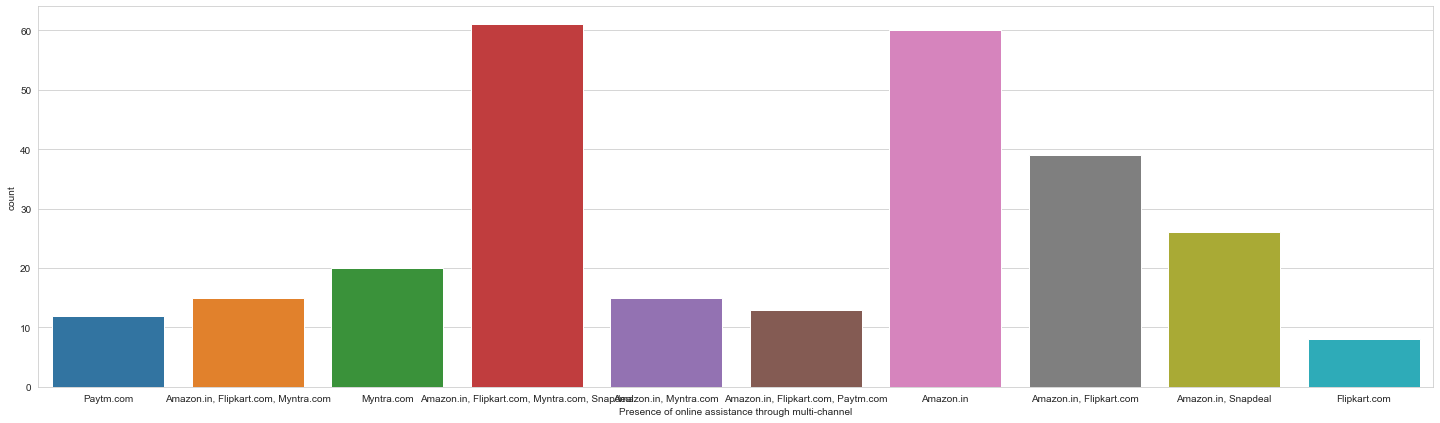

In [150]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Presence of online assistance through multi-channel',data=df)

In [151]:
df['Presence of online assistance through multi-channel'].value_counts()

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Presence of online assistance through multi-channel, dtype: int64

<AxesSubplot:xlabel='Longer time to get logged in (promotion, sales period)', ylabel='count'>

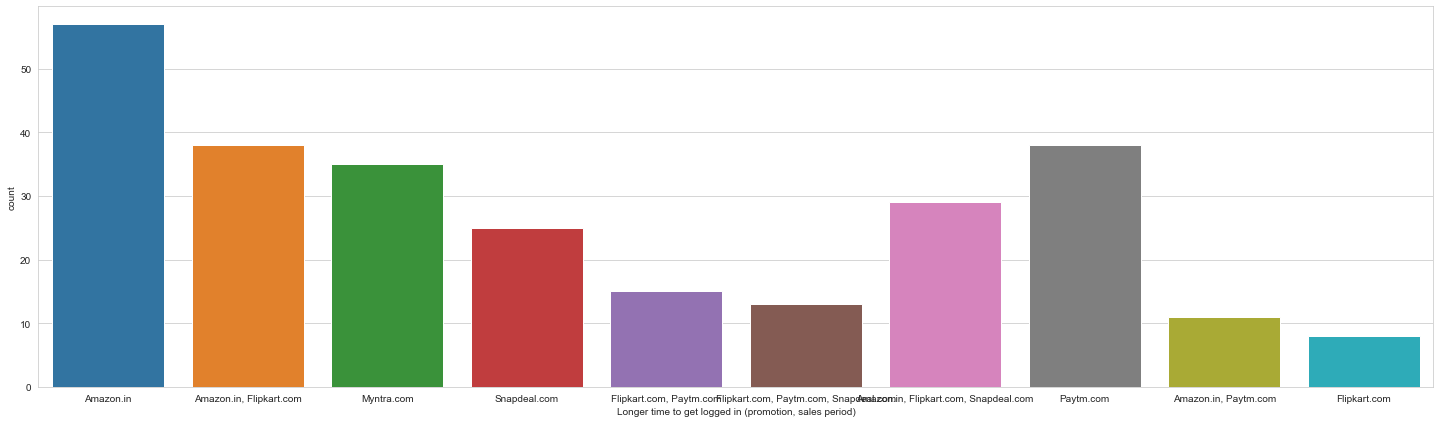

In [153]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Longer time to get logged in (promotion, sales period)',data=df)

In [154]:
df['Longer time to get logged in (promotion, sales period)'].value_counts()

Amazon.in                                57
Paytm.com                                38
Amazon.in, Flipkart.com                  38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Longer time to get logged in (promotion, sales period), dtype: int64

OBSERVATION:
    more customer responses(21.18%) were in category 'Amazon.in' and the least(3%) in 'Flipkart.com'.

<AxesSubplot:xlabel='Longer time in displaying graphics and photos (promotion, sales period)', ylabel='count'>

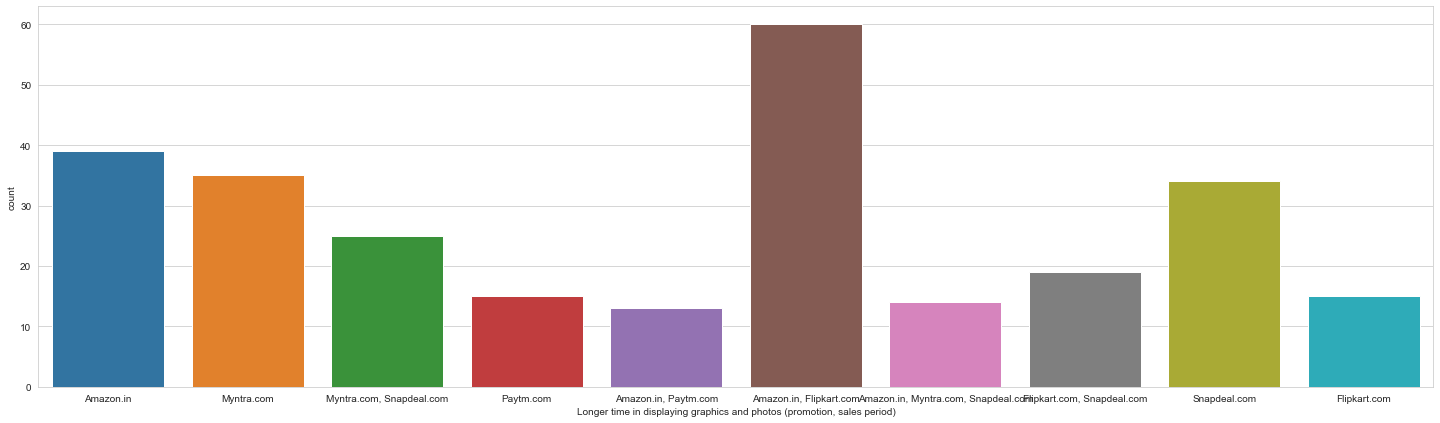

In [156]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Longer time in displaying graphics and photos (promotion, sales period)',data=df)

In [157]:
df['Longer time in displaying graphics and photos (promotion, sales period)'].value_counts()

Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Longer time in displaying graphics and photos (promotion, sales period), dtype: int64

OBSERVATIONS:
    More customers(22.3%) were in the category 'Amazon.in, Flipkart.com' and the least(4.9%) in 'Amazon.in, Paytm.com'.

<AxesSubplot:xlabel='Late declaration of price (promotion, sales period)', ylabel='count'>

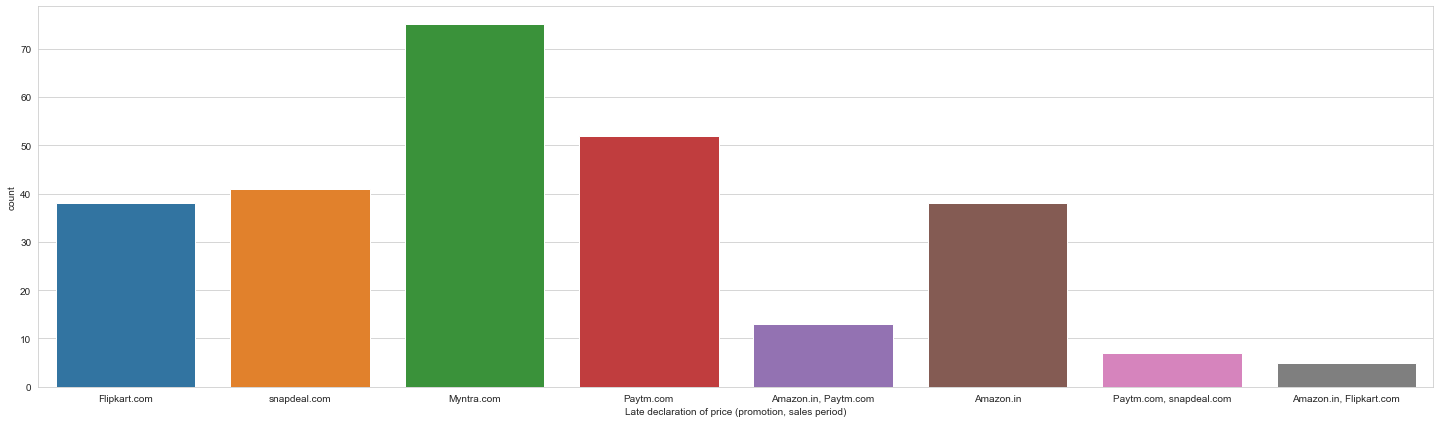

In [159]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Late declaration of price (promotion, sales period)',data=df)

In [160]:
df['Late declaration of price (promotion, sales period)'].value_counts()

Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Amazon.in                  38
Flipkart.com               38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late declaration of price (promotion, sales period), dtype: int64

OBSERVATIONS:
    Most customers were in the category 'Myntra.com' and the least in 'Amazon.in, Flipkart.com'.

<AxesSubplot:xlabel='Longer page loading time (promotion, sales period)', ylabel='count'>

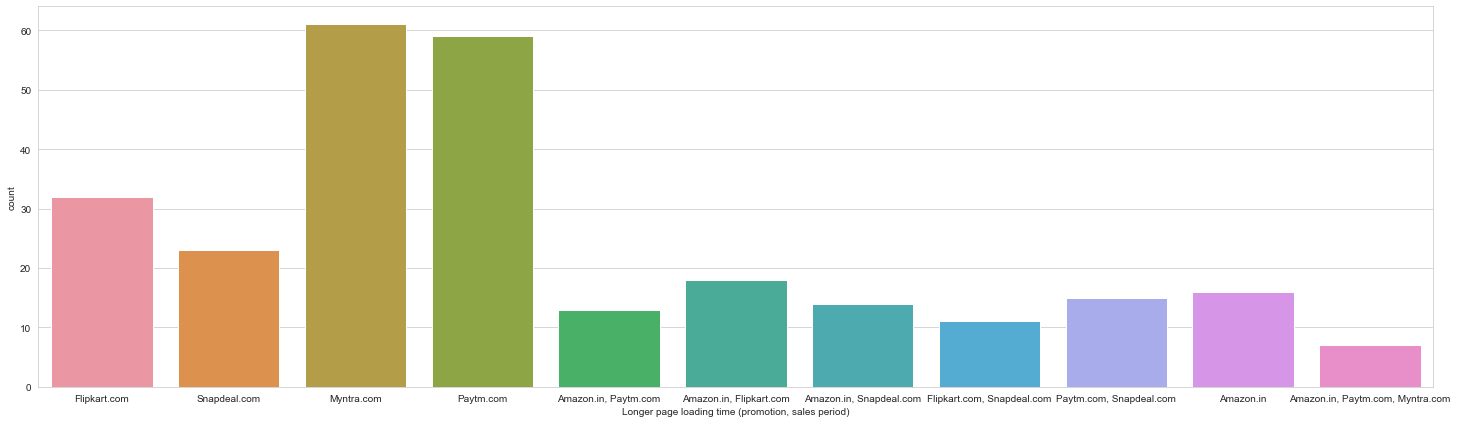

In [162]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Longer page loading time (promotion, sales period)',data=df)

In [163]:
df['Longer page loading time (promotion, sales period)'].value_counts()

Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Longer page loading time (promotion, sales period), dtype: int64

OBSERVATION:
    Most customers(22.6%) were in category 'Myntra.com' and the least(2.6%) in 'Amazon.in, Paytm.com, Myntra.com'.

<AxesSubplot:xlabel='Limited mode of payment on most products (promotion, sales period)', ylabel='count'>

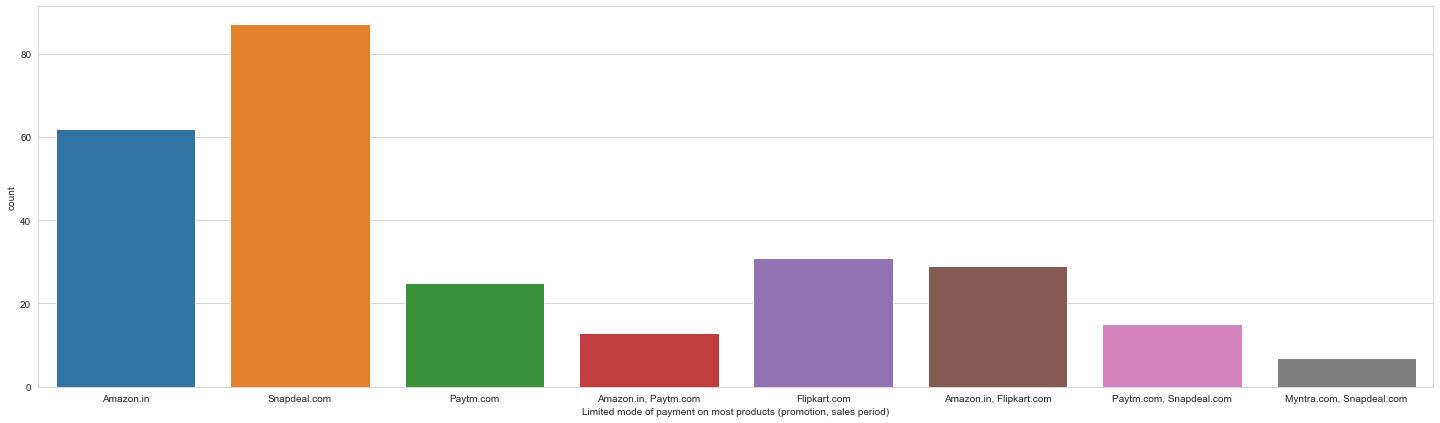

In [165]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Limited mode of payment on most products (promotion, sales period)',data=df)

In [166]:
df['Limited mode of payment on most products (promotion, sales period)'].value_counts()

Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: Limited mode of payment on most products (promotion, sales period), dtype: int64

OBSERVATION:
    Most customer responses(32.34%) were in category 'Snapdeal.com' whereas the least(2.6%) in 'Myntra.com, Snapdeal.com'.

<AxesSubplot:xlabel='Longer delivery period', ylabel='count'>

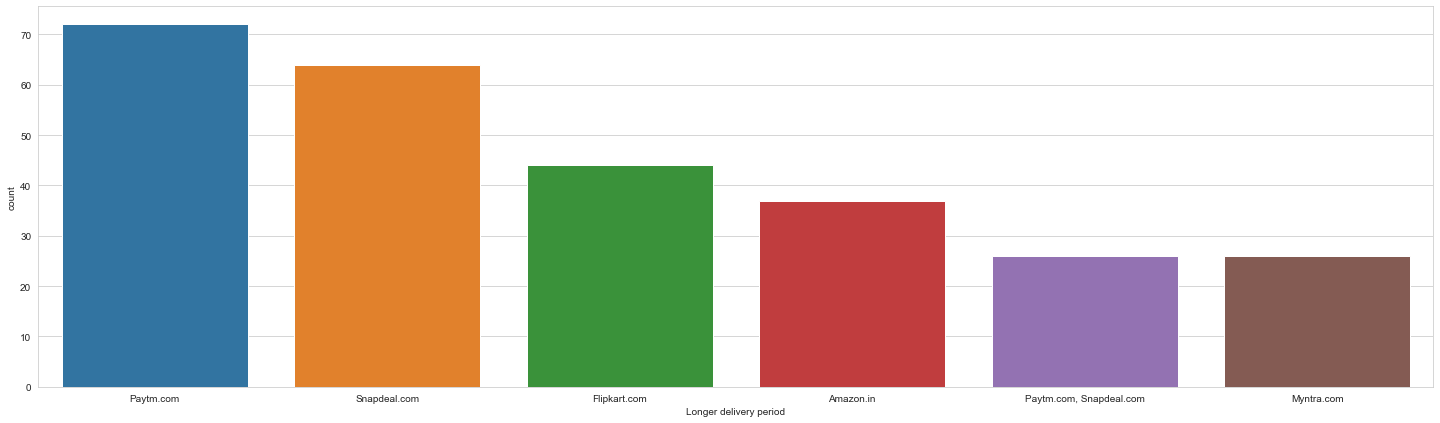

In [168]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Longer delivery period',data=df)

In [169]:
df['Longer delivery period'].value_counts()

Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Longer delivery period, dtype: int64

OBSERVATIONS:
    1)most customer responses were in category 'Paytm.com' whereas the least in 'Myntra.com'.
    2)Downward trend was obsereved in the categorical order- 'Paytm.com', 'Snapdeal.com', 'Flipkart.com', 'Amazon.in',
       'Paytm.com, Snapdeal.com', 'Myntra.com'.

<AxesSubplot:xlabel='Change in website/Application design', ylabel='count'>

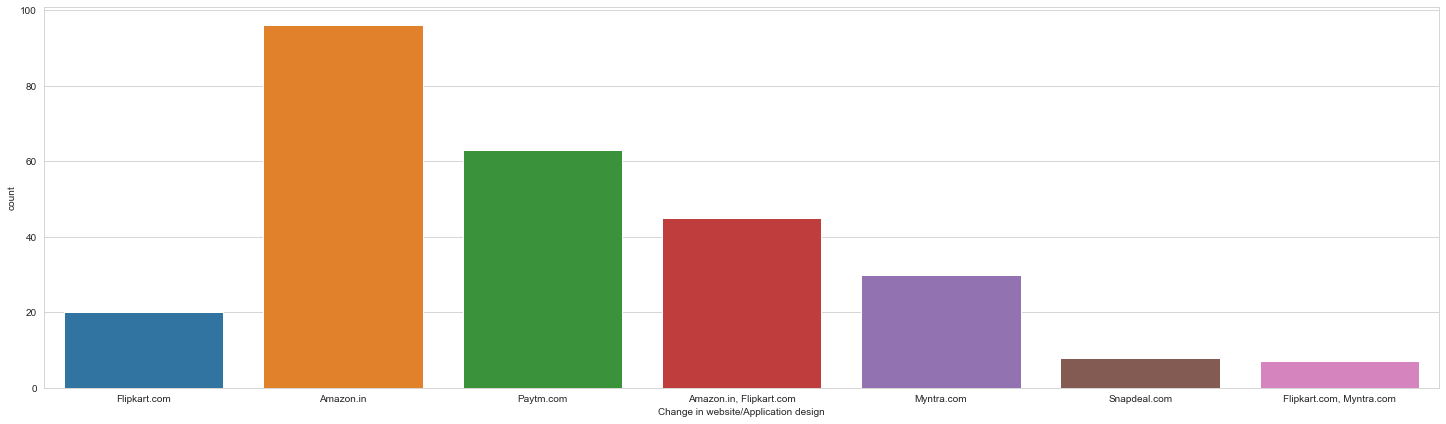

In [173]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Change in website/Application design',data=df)

In [174]:
df['Change in website/Application design'].value_counts()

Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: Change in website/Application design, dtype: int64

OBSERVATION:
    more customers(35.68%) were in category 'Amazon.in' and the least(2.6%) customers were in 'Flipkart.com, Myntra.com'.

<AxesSubplot:xlabel='Frequent disruption when moving from one page to another', ylabel='count'>

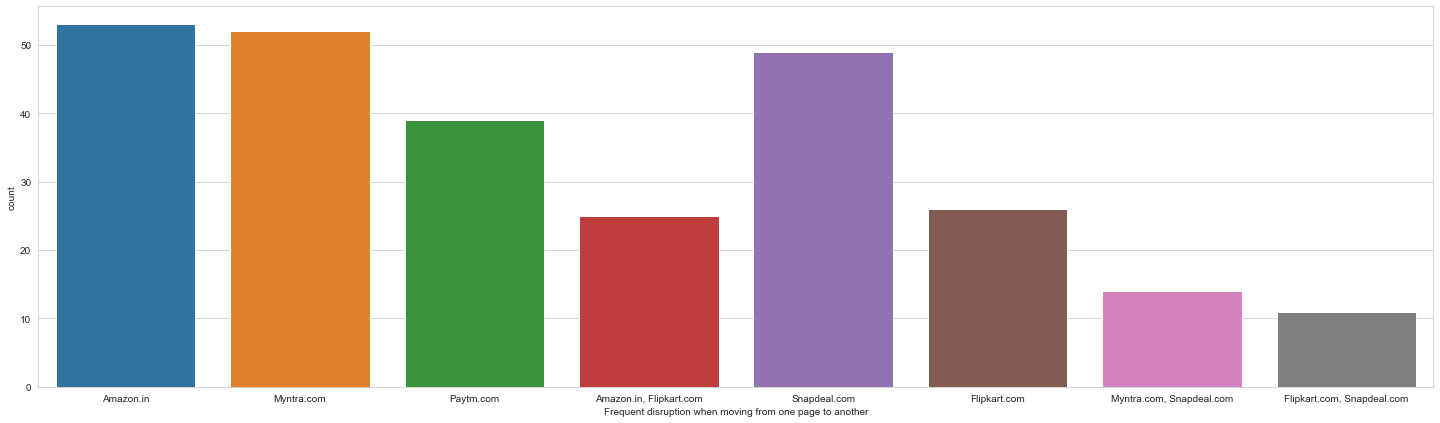

In [176]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Frequent disruption when moving from one page to another',data=df)

In [177]:
df['Frequent disruption when moving from one page to another'].value_counts()

Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Frequent disruption when moving from one page to another, dtype: int64

OBSRVATIONS:
    Most customers(19.7%) were in the category 'Amazon.in' whereas the least(4.1%) were in 'Flipkart.com, Snapdeal.com'.

<AxesSubplot:xlabel='Website is as efficient as before', ylabel='count'>

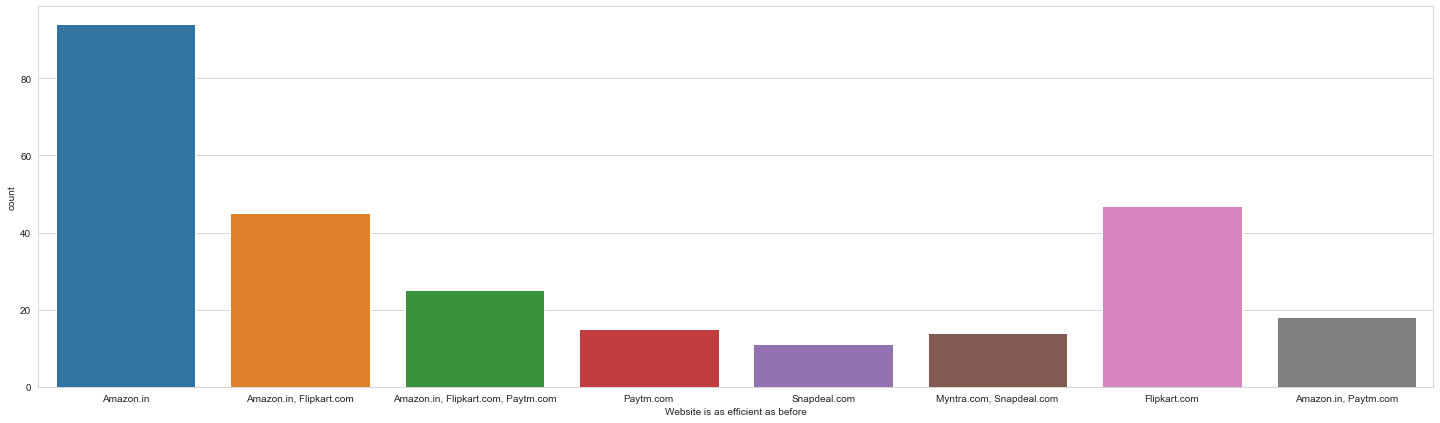

In [179]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Website is as efficient as before',data=df)

In [180]:
df['Website is as efficient as before'].value_counts()

Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: Website is as efficient as before, dtype: int64

OBSERVATION:
    Most customers(34.94%) were under the category 'Amazon.in' whereas the least(4.1%) under 'Snapdeal.com'.

<AxesSubplot:xlabel='Which of the Indian online retailer would you recommend to a friend?', ylabel='count'>

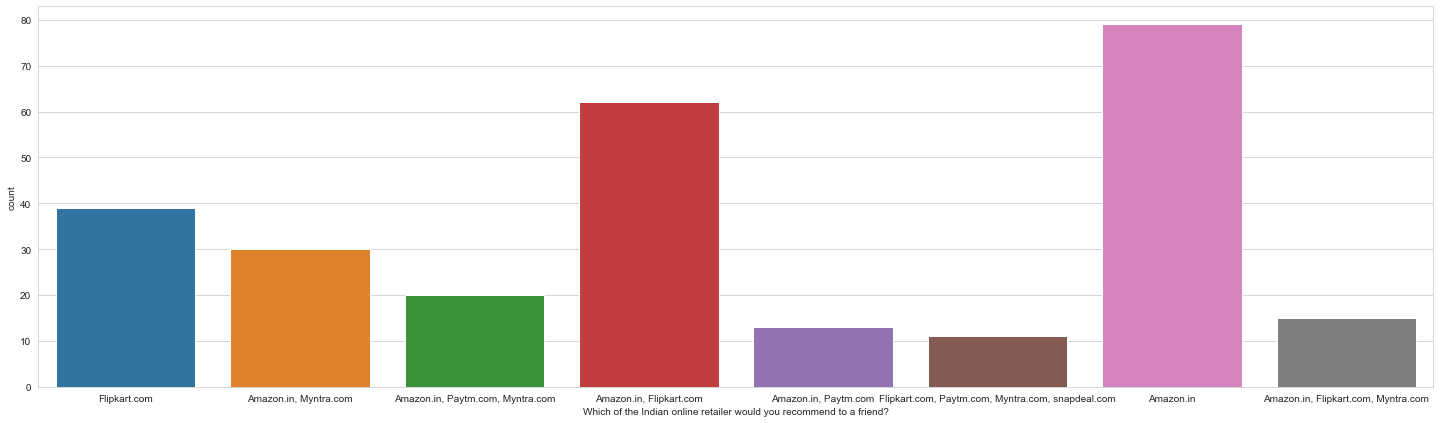

In [182]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.countplot(x='Which of the Indian online retailer would you recommend to a friend?',data=df)

In [183]:
df['Which of the Indian online retailer would you recommend to a friend?'].value_counts()

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64

OBSERVATIONS:
    Most customers(29.3%) fell under the category 'Amazon.in' and the least(4.1%)  under 'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com'.